## ***Plan of Action***


***- Exploratory Data Analysis***

***- Dealing with outliers***

***- Feature Transformation*** (Standardization/Normalization)

***- Model Building*** (Iterative process)


*Dataset:* [link](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

### Overview:
- The goal is to analyze customer behavior data from a telecom company to predict and prevent customer churn, which refers to the phenomenon where customers stop using the services of a company.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [2]:
churn = pd.read_csv("churn.csv")

In [3]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.rename(columns = {'Churn?':'Churn'}, inplace = True)

In [5]:
churn["Int'l Plan"] = churn["Int'l Plan"].map({'no': 0,'yes' :1 })
churn["VMail Plan"] = churn["VMail Plan"].map({'no': 0,'yes' :1 })
churn["Churn"] = churn["Churn"].map({'False.': 0,'True.' :1 })

In [6]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
churn = churn.drop(["State","Area Code","Phone"],axis=1)

In [8]:
target = churn["Churn"]
X = churn.drop(["Churn"],axis=1)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Int'l Plan      3333 non-null   int64  
 2   VMail Plan      3333 non-null   int64  
 3   VMail Message   3333 non-null   int64  
 4   Day Mins        3333 non-null   float64
 5   Day Calls       3333 non-null   int64  
 6   Day Charge      3333 non-null   float64
 7   Eve Mins        3333 non-null   float64
 8   Eve Calls       3333 non-null   int64  
 9   Eve Charge      3333 non-null   float64
 10  Night Mins      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Mins       3333 non-null   float64
 14  Intl Calls      3333 non-null   int64  
 15  Intl Charge     3333 non-null   float64
 16  CustServ Calls  3333 non-null   int64  
 17  Churn           3333 non-null   i

In [10]:
churn.describe()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=123)

In [12]:
tree_model = DecisionTreeClassifier(random_state=1)
fold = KFold(n_splits=5)

par_tree = {
    "max_depth":[8,10,12],
    "min_samples_leaf":[5,10]
}

In [13]:
grid_tree = GridSearchCV(estimator=tree_model,param_grid=par_tree,cv = fold,verbose=1)
# verbose = 3 for everything

In [14]:
grid_tree.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': [5, 10]},
             verbose=1)

In [15]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1)

In [16]:
# cross validation results
grid_tree.cv_results_

{'mean_fit_time': array([0.07719784, 0.0181282 , 0.02027965, 0.01567893, 0.02302318,
        0.01995015]),
 'std_fit_time': array([0.11088996, 0.00749083, 0.00506122, 0.00877354, 0.00503361,
        0.00428791]),
 'mean_score_time': array([0.0106719 , 0.00059872, 0.00316458, 0.00040069, 0.00079832,
        0.00099626]),
 'std_score_time': array([0.01785608, 0.00079771, 0.00487319, 0.00049074, 0.00074657,
        0.0012617 ]),
 'param_max_depth': masked_array(data=[8, 8, 10, 10, 12, 12],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 10, 5, 10, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 8, 'min_samples_leaf': 5},
  {'max_depth': 8, 'min_samples_leaf': 10},
  {'max_depth': 10, 'min_samples_leaf': 5},
  {'max_depth': 10, 'min_samples_leaf': 10},
  {'max_depth': 12, 'min

In [17]:
pred_tree = grid_tree.predict(x_test)

In [18]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       572
           1       0.79      0.74      0.76        95

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



In [19]:
rf_model = RandomForestClassifier(random_state=1,)
par_rf = {
    "n_estimators":[25,50,75],
    "max_depth":[8,10,12],
    "max_features":[4,5,6,7]
}

In [20]:
grid_rf = GridSearchCV(rf_model,param_grid=par_rf,cv = fold,verbose=1)

In [21]:
grid_rf.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [4, 5, 6, 7],
                         'n_estimators': [25, 50, 75]},
             verbose=1)

In [22]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=12, max_features=5, n_estimators=50,
                       random_state=1)

In [23]:
grid_rf.cv_results_

{'mean_fit_time': array([0.28870225, 0.24851727, 0.33039169, 0.14076743, 0.27393527,
        0.39714465, 0.14920635, 0.29678631, 0.44117942, 0.17108912,
        0.34266086, 0.50710092, 0.12185683, 0.24336414, 0.38629303,
        0.1827023 , 0.34659142, 0.52863941, 0.20107684, 0.38603268,
        0.60261064, 0.21842065, 0.43898253, 0.65955491, 0.15140443,
        0.27139521, 0.41577592, 0.1675982 , 0.33682952, 0.50112529,
        0.18826733, 0.36782322, 0.58316207, 0.21177564, 0.42576132,
        0.63120551]),
 'std_fit_time': array([0.32727269, 0.02944861, 0.01270282, 0.00801542, 0.00687557,
        0.01038544, 0.00301891, 0.00472858, 0.00670688, 0.00744092,
        0.02011029, 0.01319337, 0.00996799, 0.00921536, 0.02628741,
        0.02256066, 0.03647009, 0.04924526, 0.02091638, 0.04068969,
        0.05166268, 0.01439769, 0.03002735, 0.09190007, 0.01620298,
        0.00855343, 0.01160244, 0.00228751, 0.01341086, 0.01896252,
        0.00979799, 0.00320285, 0.01481471, 0.00745222, 0.007

In [24]:
print("Mean accuracy of Cross Vaildation results:",grid_rf.cv_results_["mean_test_score"].mean())
print("Standard deviation of Cross Vaildation results:",grid_rf.cv_results_["std_test_score"].mean())

Mean accuracy of Cross Vaildation results: 0.9495350948899868
Standard deviation of Cross Vaildation results: 0.009279770140324061


In [25]:
pred_rf = grid_rf.predict(x_test)

In [26]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.85      0.77      0.81        95

    accuracy                           0.95       667
   macro avg       0.91      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667



![](1.png)

In [27]:
gbc_model = GradientBoostingClassifier(random_state=1)

In [28]:
par_gbc = {
    "max_depth":[3,4,5],
    "n_estimators":[150,250],
    "learning_rate":[0.05,0.01],
}

In [29]:
grid_gbc = GridSearchCV(gbc_model,param_grid=par_gbc,cv = fold,verbose=1)

In [30]:
grid_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.05, 0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [150, 250]},
             verbose=1)

In [31]:
print(grid_gbc.best_estimator_)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=250, random_state=1)


In [32]:
print("Mean accuracy of CV:",grid_gbc.cv_results_["mean_test_score"].mean())
print("Standard deviation of CV:",grid_gbc.cv_results_["std_test_score"].mean())

Mean accuracy of CV: 0.9443240508463857
Standard deviation of CV: 0.01149133461910449


In [33]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=150,random_state=1)

In [34]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=150,
                           random_state=1)

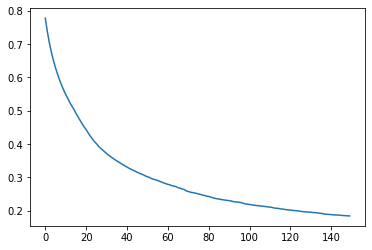

In [35]:
plt.plot(gbc.train_score_)

![](3.png)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
train_score = np.zeros(gbc.n_estimators,dtype=np.float64)
test_score = np.zeros(gbc.n_estimators,dtype=np.float64)

for i,y_pred in enumerate(gbc.staged_predict(x_train)):
    train_score[i] = accuracy_score(y_train,y_pred)

for i,y_pred in enumerate(gbc.staged_predict(x_test)):
    test_score[i] = accuracy_score(y_test,y_pred)

Text(0, 0.5, 'Accuracy')

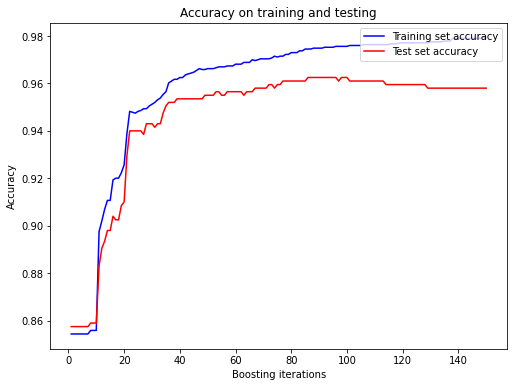

In [38]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Accuracy on training and testing")
plt.plot(np.arange(gbc.n_estimators)+1,train_score,'b-',label="Training set accuracy")
plt.plot(np.arange(gbc.n_estimators)+1,test_score,'r-',label="Test set accuracy")
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Accuracy")


In [39]:
# as we can see from the graph that till 90, both the lines are showing good signs, but after that its more deviating
gbc = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=90,random_state=1)

In [40]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=90,
                           random_state=1)

In [41]:
print(classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.94      0.79      0.86        95

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



In [42]:
import xgboost as xgb 
xgc = xgb.XGBClassifier(objective="binary:logistic")

par_xgb = {
    "n_estimators":[50,70,90,120],
    "eta":[0.1,0.05],
    "max_depth":[4,5]
}

In [43]:
grid_xgb = GridSearchCV(xgc,param_grid=par_xgb,cv = fold,verbose=1)

In [44]:
grid_xgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric=["logloss","error"])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[0]	validation_0-logloss:0.62188	validation_0-error:0.07277	validation_1-logloss:0.62393	validation_1-error:0.08546
[1]	validation_0-logloss:0.56324	validation_0-error:0.05889	validation_1-logloss:0.56660	validation_1-error:0.06897
[2]	validation_0-logloss:0.51397	validation_0-error:0.06977	validation_1-logloss:0.51860	validation_1-error:0.08846
[3]	validation_0-logloss:0.47256	validation_0-error:0.05851	validation_1-logloss:0.47799	validation_1-error:0.06897
[4]	validation_0-logloss:0.43700	validation_0-error:0.05851	validation_1-logloss:0.44342	validation_1-error:0.06897
[5]	validation_0-logloss:0.40644	validation_0-error:0.05664	validation_1-logloss:0.41402	validation_1-error:0.07046
[6]	validation_0-logloss:0.37992	validation_0-error:0.05664	validation_1-logloss:0.38928	validation_1-error:0.07046
[7]	validation_0-logloss:0.35691	validation_0-error:0.05664	validation_1-logloss:0.36640	validation_1-error:0.07046
[8]	validat

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.24311	validation_0-error:0.04389	validation_1-logloss:0.25468	validation_1-error:0.05697
[15]	validation_0-logloss:0.23320	validation_0-error:0.04089	validation_1-logloss:0.24494	validation_1-error:0.04948
[16]	validation_0-logloss:0.22346	validation_0-error:0.04089	validation_1-logloss:0.23392	validation_1-error:0.04648
[17]	validation_0-logloss:0.21588	validation_0-error:0.04014	validation_1-logloss:0.22683	validation_1-error:0.04648
[18]	validation_0-logloss:0.20914	validation_0-error:0.03826	validation_1-logloss:0.22003	validation_1-error:0.04648
[19]	validation_0-logloss:0.20245	validation_0-error:0.03713	validation_1-logloss:0.21410	validation_1-error:0.04648
[20]	validation_0-logloss:0.19661	validation_0-error:0.03863	validation_1-logloss:0.20888	validation_1-error:0.04498
[21]	validation_0-logloss:0.19040	validation_0-error:0.03788	validation_1-logloss:0.20121	validation_1-error:0.04348
[22]	validation_0-logloss:0.18601	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.15807	validation_0-error:0.03601	validation_1-logloss:0.16749	validation_1-error:0.04198
[32]	validation_0-logloss:0.15577	validation_0-error:0.03563	validation_1-logloss:0.16699	validation_1-error:0.04198
[33]	validation_0-logloss:0.15438	validation_0-error:0.03601	validation_1-logloss:0.16600	validation_1-error:0.04198
[34]	validation_0-logloss:0.15304	validation_0-error:0.03601	validation_1-logloss:0.16437	validation_1-error:0.04198
[35]	validation_0-logloss:0.15118	validation_0-error:0.03563	validation_1-logloss:0.16383	validation_1-error:0.04198
[36]	validation_0-logloss:0.15008	validation_0-error:0.03526	validation_1-logloss:0.16295	validation_1-error:0.04198
[37]	validation_0-logloss:0.14891	validation_0-error:0.03488	validation_1-logloss:0.16241	validation_1-error:0.04198
[38]	validation_0-logloss:0.14776	validation_0-error:0.03488	validation_1-logloss:0.16159	validation_1-error:0.04198
[39]	validation_0-logloss:0.14624	validation_0-error:0.03451	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.15166	validation_0-error:0.03188	validation_1-logloss:0.16870	validation_1-error:0.04648
[34]	validation_0-logloss:0.14961	validation_0-error:0.03113	validation_1-logloss:0.16599	validation_1-error:0.04498
[35]	validation_0-logloss:0.14765	validation_0-error:0.03113	validation_1-logloss:0.16532	validation_1-error:0.04348
[36]	validation_0-logloss:0.14584	validation_0-error:0.03038	validation_1-logloss:0.16288	validation_1-error:0.04198
[37]	validation_0-logloss:0.14453	validation_0-error:0.03001	validation_1-logloss:0.16258	validation_1-error:0.04198
[38]	validation_0-logloss:0.14301	validation_0-error:0.03001	validation_1-logloss:0.16052	validation_1-error:0.04348
[39]	validation_0-logloss:0.14196	validation_0-error:0.03038	validation_1-logloss:0.16021	validation_1-error:0.04348
[40]	validation_0-logloss:0.14131	validation_0-error:0.03038	validation_1-logloss:0.16000	validation_1-error:0.04348
[41]	validation_0-logloss:0.14000	validation_0-error:0.03038	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.15849	validation_0-error:0.03601	validation_1-logloss:0.18042	validation_1-error:0.04798
[32]	validation_0-logloss:0.15629	validation_0-error:0.03601	validation_1-logloss:0.17792	validation_1-error:0.04798
[33]	validation_0-logloss:0.15448	validation_0-error:0.03563	validation_1-logloss:0.17737	validation_1-error:0.04798
[34]	validation_0-logloss:0.15297	validation_0-error:0.03488	validation_1-logloss:0.17698	validation_1-error:0.04798
[35]	validation_0-logloss:0.15177	validation_0-error:0.03488	validation_1-logloss:0.17661	validation_1-error:0.04948
[36]	validation_0-logloss:0.14993	validation_0-error:0.03488	validation_1-logloss:0.17438	validation_1-error:0.04798
[37]	validation_0-logloss:0.14811	validation_0-error:0.03488	validation_1-logloss:0.17338	validation_1-error:0.04798
[38]	validation_0-logloss:0.14711	validation_0-error:0.03413	validation_1-logloss:0.17348	validation_1-error:0.04798
[39]	validation_0-logloss:0.14564	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.33175	validation_0-error:0.05514	validation_1-logloss:0.33980	validation_1-error:0.06747
[9]	validation_0-logloss:0.31230	validation_0-error:0.05476	validation_1-logloss:0.32146	validation_1-error:0.06747
[10]	validation_0-logloss:0.29549	validation_0-error:0.05439	validation_1-logloss:0.30511	validation_1-error:0.06597
[11]	validation_0-logloss:0.27969	validation_0-error:0.04689	validation_1-logloss:0.29002	validation_1-error:0.05847
[12]	validation_0-logloss:0.26602	validation_0-error:0.04501	validation_1-logloss:0.27683	validation_1-error:0.05697
[13]	validation_0-logloss:0.25366	validation_0-error:0.04276	validation_1-logloss:0.26488	validation_1-error:0.05547
[14]	validation_0-logloss:0.24249	validation_0-error:0.04239	validation_1-logloss:0.25465	validation_1-error:0.05697
[15]	validation_0-logloss:0.23294	validation_0-error:0.04276	validation_1-logloss:0.24570	validation_1-error:0.05847
[16]	validation_0-logloss:0.22423	validation_0-error:0.04126	valid

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.17340	validation_0-error:0.03526	validation_1-logloss:0.18426	validation_1-error:0.03748
[26]	validation_0-logloss:0.16934	validation_0-error:0.03526	validation_1-logloss:0.17993	validation_1-error:0.03748
[27]	validation_0-logloss:0.16617	validation_0-error:0.03488	validation_1-logloss:0.17803	validation_1-error:0.03598
[28]	validation_0-logloss:0.16327	validation_0-error:0.03413	validation_1-logloss:0.17492	validation_1-error:0.03598
[29]	validation_0-logloss:0.16052	validation_0-error:0.03376	validation_1-logloss:0.17165	validation_1-error:0.03598
[30]	validation_0-logloss:0.15817	validation_0-error:0.03376	validation_1-logloss:0.16982	validation_1-error:0.03598
[31]	validation_0-logloss:0.15555	validation_0-error:0.03301	validation_1-logloss:0.16649	validation_1-error:0.03598
[32]	validation_0-logloss:0.15348	validation_0-error:0.03226	validation_1-logloss:0.16502	validation_1-error:0.03598
[33]	validation_0-logloss:0.15155	validation_0-error:0.03188	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.14112	validation_0-error:0.03263	validation_1-logloss:0.15943	validation_1-error:0.04348
[44]	validation_0-logloss:0.13950	validation_0-error:0.03226	validation_1-logloss:0.15900	validation_1-error:0.04048
[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	validation_1-logloss:0.15915	validation_1-error:0.04048
[46]	validation_0-logloss:0.13732	validation_0-error:0.03301	validation_1-logloss:0.15929	validation_1-error:0.04048
[47]	validation_0-logloss:0.13604	validation_0-error:0.03263	validation_1-logloss:0.15867	validation_1-error:0.04198
[48]	validation_0-logloss:0.13532	validation_0-error:0.03263	validation_1-logloss:0.15774	validation_1-error:0.04048
[49]	validation_0-logloss:0.13425	validation_0-error:0.03151	validation_1-logloss:0.15770	validation_1-error:0.04198
[50]	validation_0-logloss:0.13349	validation_0-error:0.03151	validation_1-logloss:0.15739	validation_1-error:0.04198
[51]	validation_0-logloss:0.13289	validation_0-error:0.03151	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.18852	validation_0-error:0.03638	validation_1-logloss:0.20243	validation_1-error:0.05247
[22]	validation_0-logloss:0.18424	validation_0-error:0.03563	validation_1-logloss:0.19886	validation_1-error:0.05397
[23]	validation_0-logloss:0.17949	validation_0-error:0.03526	validation_1-logloss:0.19336	validation_1-error:0.05247
[24]	validation_0-logloss:0.17540	validation_0-error:0.03563	validation_1-logloss:0.18868	validation_1-error:0.05097
[25]	validation_0-logloss:0.17162	validation_0-error:0.03376	validation_1-logloss:0.18562	validation_1-error:0.04798
[26]	validation_0-logloss:0.16821	validation_0-error:0.03338	validation_1-logloss:0.18305	validation_1-error:0.04798
[27]	validation_0-logloss:0.16490	validation_0-error:0.03301	validation_1-logloss:0.17909	validation_1-error:0.04498
[28]	validation_0-logloss:0.16184	validation_0-error:0.03263	validation_1-logloss:0.17689	validation_1-error:0.04798
[29]	validation_0-logloss:0.15913	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.14564	validation_0-error:0.03413	validation_1-logloss:0.17219	validation_1-error:0.04798
[40]	validation_0-logloss:0.14466	validation_0-error:0.03376	validation_1-logloss:0.17234	validation_1-error:0.04798
[41]	validation_0-logloss:0.14368	validation_0-error:0.03376	validation_1-logloss:0.17270	validation_1-error:0.04798
[42]	validation_0-logloss:0.14304	validation_0-error:0.03338	validation_1-logloss:0.17249	validation_1-error:0.04798
[43]	validation_0-logloss:0.14170	validation_0-error:0.03338	validation_1-logloss:0.17121	validation_1-error:0.04798
[44]	validation_0-logloss:0.14028	validation_0-error:0.03226	validation_1-logloss:0.17064	validation_1-error:0.04798
[45]	validation_0-logloss:0.13964	validation_0-error:0.03263	validation_1-logloss:0.17061	validation_1-error:0.04798
[46]	validation_0-logloss:0.13866	validation_0-error:0.03226	validation_1-logloss:0.17083	validation_1-error:0.04798
[47]	validation_0-logloss:0.13785	validation_0-error:0.03151	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.16037	validation_0-error:0.03601	validation_1-logloss:0.17513	validation_1-error:0.04948
[31]	validation_0-logloss:0.15808	validation_0-error:0.03601	validation_1-logloss:0.17344	validation_1-error:0.04948
[32]	validation_0-logloss:0.15676	validation_0-error:0.03563	validation_1-logloss:0.17298	validation_1-error:0.04948
[33]	validation_0-logloss:0.15530	validation_0-error:0.03563	validation_1-logloss:0.17208	validation_1-error:0.04798
[34]	validation_0-logloss:0.15405	validation_0-error:0.03563	validation_1-logloss:0.17124	validation_1-error:0.04798
[35]	validation_0-logloss:0.15289	validation_0-error:0.03563	validation_1-logloss:0.17051	validation_1-error:0.04648
[36]	validation_0-logloss:0.15090	validation_0-error:0.03488	validation_1-logloss:0.16945	validation_1-error:0.04648
[37]	validation_0-logloss:0.14957	validation_0-error:0.03451	validation_1-logloss:0.16782	validation_1-error:0.04648
[38]	validation_0-logloss:0.14794	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.15555	validation_0-error:0.03301	validation_1-logloss:0.16649	validation_1-error:0.03598
[32]	validation_0-logloss:0.15348	validation_0-error:0.03226	validation_1-logloss:0.16502	validation_1-error:0.03598
[33]	validation_0-logloss:0.15155	validation_0-error:0.03188	validation_1-logloss:0.16250	validation_1-error:0.03598
[34]	validation_0-logloss:0.14985	validation_0-error:0.03226	validation_1-logloss:0.15996	validation_1-error:0.03748
[35]	validation_0-logloss:0.14818	validation_0-error:0.03188	validation_1-logloss:0.15990	validation_1-error:0.03748
[36]	validation_0-logloss:0.14678	validation_0-error:0.03226	validation_1-logloss:0.15961	validation_1-error:0.03598
[37]	validation_0-logloss:0.14530	validation_0-error:0.03263	validation_1-logloss:0.15831	validation_1-error:0.03448
[38]	validation_0-logloss:0.14368	validation_0-error:0.03151	validation_1-logloss:0.15703	validation_1-error:0.03598
[39]	validation_0-logloss:0.14230	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.14891	validation_0-error:0.03488	validation_1-logloss:0.16241	validation_1-error:0.04198
[38]	validation_0-logloss:0.14776	validation_0-error:0.03488	validation_1-logloss:0.16159	validation_1-error:0.04198
[39]	validation_0-logloss:0.14624	validation_0-error:0.03451	validation_1-logloss:0.16093	validation_1-error:0.04348
[40]	validation_0-logloss:0.14408	validation_0-error:0.03451	validation_1-logloss:0.16052	validation_1-error:0.04348
[41]	validation_0-logloss:0.14278	validation_0-error:0.03413	validation_1-logloss:0.16016	validation_1-error:0.04348
[42]	validation_0-logloss:0.14151	validation_0-error:0.03338	validation_1-logloss:0.15963	validation_1-error:0.04348
[43]	validation_0-logloss:0.14112	validation_0-error:0.03263	validation_1-logloss:0.15943	validation_1-error:0.04348
[44]	validation_0-logloss:0.13950	validation_0-error:0.03226	validation_1-logloss:0.15900	validation_1-error:0.04048
[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.14196	validation_0-error:0.03038	validation_1-logloss:0.16021	validation_1-error:0.04348
[40]	validation_0-logloss:0.14131	validation_0-error:0.03038	validation_1-logloss:0.16000	validation_1-error:0.04348
[41]	validation_0-logloss:0.14000	validation_0-error:0.03038	validation_1-logloss:0.15837	validation_1-error:0.04498
[42]	validation_0-logloss:0.13899	validation_0-error:0.03001	validation_1-logloss:0.15809	validation_1-error:0.04498
[43]	validation_0-logloss:0.13745	validation_0-error:0.02963	validation_1-logloss:0.15635	validation_1-error:0.04198
[44]	validation_0-logloss:0.13587	validation_0-error:0.02888	validation_1-logloss:0.15591	validation_1-error:0.04348
[45]	validation_0-logloss:0.13503	validation_0-error:0.02851	validation_1-logloss:0.15537	validation_1-error:0.04348
[46]	validation_0-logloss:0.13406	validation_0-error:0.02888	validation_1-logloss:0.15404	validation_1-error:0.04348
[47]	validation_0-logloss:0.13299	validation_0-error:0.02851	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.14466	validation_0-error:0.03376	validation_1-logloss:0.17234	validation_1-error:0.04798
[41]	validation_0-logloss:0.14368	validation_0-error:0.03376	validation_1-logloss:0.17270	validation_1-error:0.04798
[42]	validation_0-logloss:0.14304	validation_0-error:0.03338	validation_1-logloss:0.17249	validation_1-error:0.04798
[43]	validation_0-logloss:0.14170	validation_0-error:0.03338	validation_1-logloss:0.17121	validation_1-error:0.04798
[44]	validation_0-logloss:0.14028	validation_0-error:0.03226	validation_1-logloss:0.17064	validation_1-error:0.04798
[45]	validation_0-logloss:0.13964	validation_0-error:0.03263	validation_1-logloss:0.17061	validation_1-error:0.04798
[46]	validation_0-logloss:0.13866	validation_0-error:0.03226	validation_1-logloss:0.17083	validation_1-error:0.04798
[47]	validation_0-logloss:0.13785	validation_0-error:0.03151	validation_1-logloss:0.17008	validation_1-error:0.04648
[48]	validation_0-logloss:0.13728	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.15405	validation_0-error:0.03563	validation_1-logloss:0.17124	validation_1-error:0.04798
[35]	validation_0-logloss:0.15289	validation_0-error:0.03563	validation_1-logloss:0.17051	validation_1-error:0.04648
[36]	validation_0-logloss:0.15090	validation_0-error:0.03488	validation_1-logloss:0.16945	validation_1-error:0.04648
[37]	validation_0-logloss:0.14957	validation_0-error:0.03451	validation_1-logloss:0.16782	validation_1-error:0.04648
[38]	validation_0-logloss:0.14794	validation_0-error:0.03413	validation_1-logloss:0.16733	validation_1-error:0.04648
[39]	validation_0-logloss:0.14702	validation_0-error:0.03376	validation_1-logloss:0.16756	validation_1-error:0.04648
[40]	validation_0-logloss:0.14548	validation_0-error:0.03338	validation_1-logloss:0.16649	validation_1-error:0.04648
[41]	validation_0-logloss:0.14462	validation_0-error:0.03376	validation_1-logloss:0.16607	validation_1-error:0.04648
[42]	validation_0-logloss:0.14387	validation_0-error:0.03338	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.14368	validation_0-error:0.03151	validation_1-logloss:0.15703	validation_1-error:0.03598
[39]	validation_0-logloss:0.14230	validation_0-error:0.03113	validation_1-logloss:0.15623	validation_1-error:0.03298
[40]	validation_0-logloss:0.14097	validation_0-error:0.03076	validation_1-logloss:0.15492	validation_1-error:0.03448
[41]	validation_0-logloss:0.14042	validation_0-error:0.03076	validation_1-logloss:0.15444	validation_1-error:0.03448
[42]	validation_0-logloss:0.13902	validation_0-error:0.03076	validation_1-logloss:0.15348	validation_1-error:0.03448
[43]	validation_0-logloss:0.13758	validation_0-error:0.03076	validation_1-logloss:0.15267	validation_1-error:0.03448
[44]	validation_0-logloss:0.13603	validation_0-error:0.03038	validation_1-logloss:0.15276	validation_1-error:0.03448
[45]	validation_0-logloss:0.13546	validation_0-error:0.03076	validation_1-logloss:0.15207	validation_1-error:0.03448
[46]	validation_0-logloss:0.13468	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.14624	validation_0-error:0.03451	validation_1-logloss:0.16093	validation_1-error:0.04348
[40]	validation_0-logloss:0.14408	validation_0-error:0.03451	validation_1-logloss:0.16052	validation_1-error:0.04348
[41]	validation_0-logloss:0.14278	validation_0-error:0.03413	validation_1-logloss:0.16016	validation_1-error:0.04348
[42]	validation_0-logloss:0.14151	validation_0-error:0.03338	validation_1-logloss:0.15963	validation_1-error:0.04348
[43]	validation_0-logloss:0.14112	validation_0-error:0.03263	validation_1-logloss:0.15943	validation_1-error:0.04348
[44]	validation_0-logloss:0.13950	validation_0-error:0.03226	validation_1-logloss:0.15900	validation_1-error:0.04048
[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	validation_1-logloss:0.15915	validation_1-error:0.04048
[46]	validation_0-logloss:0.13732	validation_0-error:0.03301	validation_1-logloss:0.15929	validation_1-error:0.04048
[47]	validation_0-logloss:0.13604	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.20629	validation_0-error:0.03976	validation_1-logloss:0.22036	validation_1-error:0.05847
[19]	validation_0-logloss:0.19984	validation_0-error:0.04014	validation_1-logloss:0.21495	validation_1-error:0.05547
[20]	validation_0-logloss:0.19433	validation_0-error:0.03638	validation_1-logloss:0.20969	validation_1-error:0.05697
[21]	validation_0-logloss:0.18852	validation_0-error:0.03638	validation_1-logloss:0.20243	validation_1-error:0.05247
[22]	validation_0-logloss:0.18424	validation_0-error:0.03563	validation_1-logloss:0.19886	validation_1-error:0.05397
[23]	validation_0-logloss:0.17949	validation_0-error:0.03526	validation_1-logloss:0.19336	validation_1-error:0.05247
[24]	validation_0-logloss:0.17540	validation_0-error:0.03563	validation_1-logloss:0.18868	validation_1-error:0.05097
[25]	validation_0-logloss:0.17162	validation_0-error:0.03376	validation_1-logloss:0.18562	validation_1-error:0.04798
[26]	validation_0-logloss:0.16821	validation_0-error:0.03338	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.15849	validation_0-error:0.03601	validation_1-logloss:0.18042	validation_1-error:0.04798
[32]	validation_0-logloss:0.15629	validation_0-error:0.03601	validation_1-logloss:0.17792	validation_1-error:0.04798
[33]	validation_0-logloss:0.15448	validation_0-error:0.03563	validation_1-logloss:0.17737	validation_1-error:0.04798
[34]	validation_0-logloss:0.15297	validation_0-error:0.03488	validation_1-logloss:0.17698	validation_1-error:0.04798
[35]	validation_0-logloss:0.15177	validation_0-error:0.03488	validation_1-logloss:0.17661	validation_1-error:0.04948
[36]	validation_0-logloss:0.14993	validation_0-error:0.03488	validation_1-logloss:0.17438	validation_1-error:0.04798
[37]	validation_0-logloss:0.14811	validation_0-error:0.03488	validation_1-logloss:0.17338	validation_1-error:0.04798
[38]	validation_0-logloss:0.14711	validation_0-error:0.03413	validation_1-logloss:0.17348	validation_1-error:0.04798
[39]	validation_0-logloss:0.14564	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.14462	validation_0-error:0.03376	validation_1-logloss:0.16607	validation_1-error:0.04648
[42]	validation_0-logloss:0.14387	validation_0-error:0.03338	validation_1-logloss:0.16635	validation_1-error:0.04648
[43]	validation_0-logloss:0.14230	validation_0-error:0.03338	validation_1-logloss:0.16616	validation_1-error:0.04648
[44]	validation_0-logloss:0.14091	validation_0-error:0.03376	validation_1-logloss:0.16532	validation_1-error:0.04648
[45]	validation_0-logloss:0.13949	validation_0-error:0.03376	validation_1-logloss:0.16464	validation_1-error:0.04648
[46]	validation_0-logloss:0.13883	validation_0-error:0.03338	validation_1-logloss:0.16450	validation_1-error:0.04648
[47]	validation_0-logloss:0.13794	validation_0-error:0.03376	validation_1-logloss:0.16356	validation_1-error:0.04648
[48]	validation_0-logloss:0.13713	validation_0-error:0.03338	validation_1-logloss:0.16330	validation_1-error:0.04648
[49]	validation_0-logloss:0.13641	validation_0-error:0.03338	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.15410	validation_0-error:0.03001	validation_1-logloss:0.17437	validation_1-error:0.03898
[25]	validation_0-logloss:0.15067	validation_0-error:0.03001	validation_1-logloss:0.17091	validation_1-error:0.03898
[26]	validation_0-logloss:0.14731	validation_0-error:0.03001	validation_1-logloss:0.16930	validation_1-error:0.03898
[27]	validation_0-logloss:0.14433	validation_0-error:0.02963	validation_1-logloss:0.16649	validation_1-error:0.03898
[28]	validation_0-logloss:0.14134	validation_0-error:0.02926	validation_1-logloss:0.16449	validation_1-error:0.03898
[29]	validation_0-logloss:0.13885	validation_0-error:0.02851	validation_1-logloss:0.16222	validation_1-error:0.03898
[30]	validation_0-logloss:0.13593	validation_0-error:0.02813	validation_1-logloss:0.16079	validation_1-error:0.03898
[31]	validation_0-logloss:0.13392	validation_0-error:0.02813	validation_1-logloss:0.15923	validation_1-error:0.03898
[32]	validation_0-logloss:0.13144	validation_0-error:0.02738	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.12710	validation_0-error:0.03076	validation_1-logloss:0.15197	validation_1-error:0.03898
[36]	validation_0-logloss:0.12615	validation_0-error:0.03076	validation_1-logloss:0.15163	validation_1-error:0.04048
[37]	validation_0-logloss:0.12515	validation_0-error:0.03076	validation_1-logloss:0.15031	validation_1-error:0.03898
[38]	validation_0-logloss:0.12297	validation_0-error:0.03076	validation_1-logloss:0.14947	validation_1-error:0.03898
[39]	validation_0-logloss:0.12171	validation_0-error:0.03038	validation_1-logloss:0.14829	validation_1-error:0.03898
[40]	validation_0-logloss:0.12069	validation_0-error:0.03001	validation_1-logloss:0.14807	validation_1-error:0.03898
[41]	validation_0-logloss:0.11954	validation_0-error:0.02963	validation_1-logloss:0.14711	validation_1-error:0.03448
[42]	validation_0-logloss:0.11893	validation_0-error:0.02963	validation_1-logloss:0.14661	validation_1-error:0.03298
[43]	validation_0-logloss:0.11784	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.15351	validation_0-error:0.02888	validation_1-logloss:0.17713	validation_1-error:0.04648
[25]	validation_0-logloss:0.15020	validation_0-error:0.02888	validation_1-logloss:0.17385	validation_1-error:0.04648
[26]	validation_0-logloss:0.14703	validation_0-error:0.02851	validation_1-logloss:0.17180	validation_1-error:0.04498
[27]	validation_0-logloss:0.14447	validation_0-error:0.02851	validation_1-logloss:0.16920	validation_1-error:0.04498
[28]	validation_0-logloss:0.14181	validation_0-error:0.02813	validation_1-logloss:0.16800	validation_1-error:0.04498
[29]	validation_0-logloss:0.13920	validation_0-error:0.02738	validation_1-logloss:0.16529	validation_1-error:0.04498
[30]	validation_0-logloss:0.13606	validation_0-error:0.02738	validation_1-logloss:0.16377	validation_1-error:0.04498
[31]	validation_0-logloss:0.13401	validation_0-error:0.02776	validation_1-logloss:0.16189	validation_1-error:0.04348
[32]	validation_0-logloss:0.13133	validation_0-error:0.02776	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.12139	validation_0-error:0.03151	validation_1-logloss:0.16447	validation_1-error:0.04198
[39]	validation_0-logloss:0.12032	validation_0-error:0.03151	validation_1-logloss:0.16350	validation_1-error:0.04048
[40]	validation_0-logloss:0.11919	validation_0-error:0.03151	validation_1-logloss:0.16378	validation_1-error:0.04048
[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	validation_1-logloss:0.16285	validation_1-error:0.04048
[43]	validation_0-logloss:0.11662	validation_0-error:0.03076	validation_1-logloss:0.16189	validation_1-error:0.04048
[44]	validation_0-logloss:0.11503	validation_0-error:0.03038	validation_1-logloss:0.16202	validation_1-error:0.04198
[45]	validation_0-logloss:0.11352	validation_0-error:0.03001	validation_1-logloss:0.16172	validation_1-error:0.04198
[46]	validation_0-logloss:0.11196	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.13669	validation_0-error:0.03113	validation_1-logloss:0.16285	validation_1-error:0.04648
[31]	validation_0-logloss:0.13384	validation_0-error:0.03038	validation_1-logloss:0.16177	validation_1-error:0.04648
[32]	validation_0-logloss:0.13162	validation_0-error:0.03076	validation_1-logloss:0.16007	validation_1-error:0.04648
[33]	validation_0-logloss:0.12918	validation_0-error:0.03038	validation_1-logloss:0.15877	validation_1-error:0.04648
[34]	validation_0-logloss:0.12772	validation_0-error:0.03001	validation_1-logloss:0.15870	validation_1-error:0.04648
[35]	validation_0-logloss:0.12593	validation_0-error:0.02926	validation_1-logloss:0.15742	validation_1-error:0.04648
[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.13885	validation_0-error:0.02851	validation_1-logloss:0.16222	validation_1-error:0.03898
[30]	validation_0-logloss:0.13593	validation_0-error:0.02813	validation_1-logloss:0.16079	validation_1-error:0.03898
[31]	validation_0-logloss:0.13392	validation_0-error:0.02813	validation_1-logloss:0.15923	validation_1-error:0.03898
[32]	validation_0-logloss:0.13144	validation_0-error:0.02738	validation_1-logloss:0.15702	validation_1-error:0.03898
[33]	validation_0-logloss:0.12927	validation_0-error:0.02851	validation_1-logloss:0.15500	validation_1-error:0.03898
[34]	validation_0-logloss:0.12641	validation_0-error:0.02738	validation_1-logloss:0.15441	validation_1-error:0.03898
[35]	validation_0-logloss:0.12454	validation_0-error:0.02813	validation_1-logloss:0.15273	validation_1-error:0.03898
[36]	validation_0-logloss:0.12209	validation_0-error:0.02813	validation_1-logloss:0.15238	validation_1-error:0.03898
[37]	validation_0-logloss:0.12085	validation_0-error:0.02813	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.12615	validation_0-error:0.03076	validation_1-logloss:0.15163	validation_1-error:0.04048
[37]	validation_0-logloss:0.12515	validation_0-error:0.03076	validation_1-logloss:0.15031	validation_1-error:0.03898
[38]	validation_0-logloss:0.12297	validation_0-error:0.03076	validation_1-logloss:0.14947	validation_1-error:0.03898
[39]	validation_0-logloss:0.12171	validation_0-error:0.03038	validation_1-logloss:0.14829	validation_1-error:0.03898
[40]	validation_0-logloss:0.12069	validation_0-error:0.03001	validation_1-logloss:0.14807	validation_1-error:0.03898
[41]	validation_0-logloss:0.11954	validation_0-error:0.02963	validation_1-logloss:0.14711	validation_1-error:0.03448
[42]	validation_0-logloss:0.11893	validation_0-error:0.02963	validation_1-logloss:0.14661	validation_1-error:0.03298
[43]	validation_0-logloss:0.11784	validation_0-error:0.03001	validation_1-logloss:0.14625	validation_1-error:0.03298
[44]	validation_0-logloss:0.11727	validation_0-error:0.03038	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.12302	validation_0-error:0.02738	validation_1-logloss:0.15702	validation_1-error:0.04498
[38]	validation_0-logloss:0.12153	validation_0-error:0.02738	validation_1-logloss:0.15667	validation_1-error:0.04348
[39]	validation_0-logloss:0.12047	validation_0-error:0.02701	validation_1-logloss:0.15664	validation_1-error:0.04348
[40]	validation_0-logloss:0.11921	validation_0-error:0.02701	validation_1-logloss:0.15549	validation_1-error:0.04198
[41]	validation_0-logloss:0.11798	validation_0-error:0.02663	validation_1-logloss:0.15523	validation_1-error:0.04198
[42]	validation_0-logloss:0.11661	validation_0-error:0.02663	validation_1-logloss:0.15484	validation_1-error:0.03898
[43]	validation_0-logloss:0.11565	validation_0-error:0.02663	validation_1-logloss:0.15464	validation_1-error:0.03898
[44]	validation_0-logloss:0.11442	validation_0-error:0.02663	validation_1-logloss:0.15377	validation_1-error:0.03898
[45]	validation_0-logloss:0.11327	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.12857	validation_0-error:0.03188	validation_1-logloss:0.16588	validation_1-error:0.04198
[35]	validation_0-logloss:0.12622	validation_0-error:0.03151	validation_1-logloss:0.16437	validation_1-error:0.04198
[36]	validation_0-logloss:0.12459	validation_0-error:0.03151	validation_1-logloss:0.16459	validation_1-error:0.04198
[37]	validation_0-logloss:0.12308	validation_0-error:0.03113	validation_1-logloss:0.16455	validation_1-error:0.04198
[38]	validation_0-logloss:0.12139	validation_0-error:0.03151	validation_1-logloss:0.16447	validation_1-error:0.04198
[39]	validation_0-logloss:0.12032	validation_0-error:0.03151	validation_1-logloss:0.16350	validation_1-error:0.04048
[40]	validation_0-logloss:0.11919	validation_0-error:0.03151	validation_1-logloss:0.16378	validation_1-error:0.04048
[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-logloss:0.13162	validation_0-error:0.03076	validation_1-logloss:0.16007	validation_1-error:0.04648
[33]	validation_0-logloss:0.12918	validation_0-error:0.03038	validation_1-logloss:0.15877	validation_1-error:0.04648
[34]	validation_0-logloss:0.12772	validation_0-error:0.03001	validation_1-logloss:0.15870	validation_1-error:0.04648
[35]	validation_0-logloss:0.12593	validation_0-error:0.02926	validation_1-logloss:0.15742	validation_1-error:0.04648
[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	validation_1-logloss:0.15514	validation_1-error:0.04648
[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.16612	validation_0-error:0.03076	validation_1-logloss:0.18293	validation_1-error:0.04048
[22]	validation_0-logloss:0.16141	validation_0-error:0.03076	validation_1-logloss:0.17966	validation_1-error:0.03898
[23]	validation_0-logloss:0.15784	validation_0-error:0.03038	validation_1-logloss:0.17574	validation_1-error:0.03898
[24]	validation_0-logloss:0.15410	validation_0-error:0.03001	validation_1-logloss:0.17437	validation_1-error:0.03898
[25]	validation_0-logloss:0.15067	validation_0-error:0.03001	validation_1-logloss:0.17091	validation_1-error:0.03898
[26]	validation_0-logloss:0.14731	validation_0-error:0.03001	validation_1-logloss:0.16930	validation_1-error:0.03898
[27]	validation_0-logloss:0.14433	validation_0-error:0.02963	validation_1-logloss:0.16649	validation_1-error:0.03898
[28]	validation_0-logloss:0.14134	validation_0-error:0.02926	validation_1-logloss:0.16449	validation_1-error:0.03898
[29]	validation_0-logloss:0.13885	validation_0-error:0.02851	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.17028	validation_0-error:0.03676	validation_1-logloss:0.18686	validation_1-error:0.04348
[21]	validation_0-logloss:0.16517	validation_0-error:0.03713	validation_1-logloss:0.18350	validation_1-error:0.04348
[22]	validation_0-logloss:0.16123	validation_0-error:0.03601	validation_1-logloss:0.17868	validation_1-error:0.04198
[23]	validation_0-logloss:0.15669	validation_0-error:0.03526	validation_1-logloss:0.17525	validation_1-error:0.04198
[24]	validation_0-logloss:0.15310	validation_0-error:0.03451	validation_1-logloss:0.17207	validation_1-error:0.03898
[25]	validation_0-logloss:0.15023	validation_0-error:0.03376	validation_1-logloss:0.16856	validation_1-error:0.03898
[26]	validation_0-logloss:0.14735	validation_0-error:0.03338	validation_1-logloss:0.16579	validation_1-error:0.04048
[27]	validation_0-logloss:0.14487	validation_0-error:0.03338	validation_1-logloss:0.16292	validation_1-error:0.04048
[28]	validation_0-logloss:0.14170	validation_0-error:0.03301	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.13920	validation_0-error:0.02738	validation_1-logloss:0.16529	validation_1-error:0.04498
[30]	validation_0-logloss:0.13606	validation_0-error:0.02738	validation_1-logloss:0.16377	validation_1-error:0.04498
[31]	validation_0-logloss:0.13401	validation_0-error:0.02776	validation_1-logloss:0.16189	validation_1-error:0.04348
[32]	validation_0-logloss:0.13133	validation_0-error:0.02776	validation_1-logloss:0.16096	validation_1-error:0.04198
[33]	validation_0-logloss:0.12969	validation_0-error:0.02738	validation_1-logloss:0.15927	validation_1-error:0.04348
[34]	validation_0-logloss:0.12732	validation_0-error:0.02663	validation_1-logloss:0.15869	validation_1-error:0.04198
[35]	validation_0-logloss:0.12578	validation_0-error:0.02663	validation_1-logloss:0.15683	validation_1-error:0.04348
[36]	validation_0-logloss:0.12440	validation_0-error:0.02663	validation_1-logloss:0.15679	validation_1-error:0.04198
[37]	validation_0-logloss:0.12302	validation_0-error:0.02738	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.12622	validation_0-error:0.03151	validation_1-logloss:0.16437	validation_1-error:0.04198
[36]	validation_0-logloss:0.12459	validation_0-error:0.03151	validation_1-logloss:0.16459	validation_1-error:0.04198
[37]	validation_0-logloss:0.12308	validation_0-error:0.03113	validation_1-logloss:0.16455	validation_1-error:0.04198
[38]	validation_0-logloss:0.12139	validation_0-error:0.03151	validation_1-logloss:0.16447	validation_1-error:0.04198
[39]	validation_0-logloss:0.12032	validation_0-error:0.03151	validation_1-logloss:0.16350	validation_1-error:0.04048
[40]	validation_0-logloss:0.11919	validation_0-error:0.03151	validation_1-logloss:0.16378	validation_1-error:0.04048
[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	validation_1-logloss:0.16285	validation_1-error:0.04048
[43]	validation_0-logloss:0.11662	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.12772	validation_0-error:0.03001	validation_1-logloss:0.15870	validation_1-error:0.04648
[35]	validation_0-logloss:0.12593	validation_0-error:0.02926	validation_1-logloss:0.15742	validation_1-error:0.04648
[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	validation_1-logloss:0.15514	validation_1-error:0.04648
[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	validation_1-logloss:0.15525	validation_1-error:0.04648
[41]	validation_0-logloss:0.11803	validation_0-error:0.02851	validation_1-logloss:0.15582	validation_1-error:0.04498
[42]	validation_0-logloss:0.11678	validation_0-error:0.02851	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.12209	validation_0-error:0.02813	validation_1-logloss:0.15238	validation_1-error:0.03898
[37]	validation_0-logloss:0.12085	validation_0-error:0.02813	validation_1-logloss:0.15147	validation_1-error:0.03898
[38]	validation_0-logloss:0.11906	validation_0-error:0.02888	validation_1-logloss:0.15074	validation_1-error:0.03898
[39]	validation_0-logloss:0.11806	validation_0-error:0.02813	validation_1-logloss:0.15006	validation_1-error:0.03898
[40]	validation_0-logloss:0.11655	validation_0-error:0.02738	validation_1-logloss:0.14876	validation_1-error:0.03898
[41]	validation_0-logloss:0.11470	validation_0-error:0.02738	validation_1-logloss:0.14812	validation_1-error:0.03748
[42]	validation_0-logloss:0.11402	validation_0-error:0.02701	validation_1-logloss:0.14724	validation_1-error:0.03598
[43]	validation_0-logloss:0.11282	validation_0-error:0.02701	validation_1-logloss:0.14725	validation_1-error:0.03448
[44]	validation_0-logloss:0.11137	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.15669	validation_0-error:0.03526	validation_1-logloss:0.17525	validation_1-error:0.04198
[24]	validation_0-logloss:0.15310	validation_0-error:0.03451	validation_1-logloss:0.17207	validation_1-error:0.03898
[25]	validation_0-logloss:0.15023	validation_0-error:0.03376	validation_1-logloss:0.16856	validation_1-error:0.03898
[26]	validation_0-logloss:0.14735	validation_0-error:0.03338	validation_1-logloss:0.16579	validation_1-error:0.04048
[27]	validation_0-logloss:0.14487	validation_0-error:0.03338	validation_1-logloss:0.16292	validation_1-error:0.04048
[28]	validation_0-logloss:0.14170	validation_0-error:0.03301	validation_1-logloss:0.16093	validation_1-error:0.04048
[29]	validation_0-logloss:0.13934	validation_0-error:0.03301	validation_1-logloss:0.15942	validation_1-error:0.04048
[30]	validation_0-logloss:0.13731	validation_0-error:0.03226	validation_1-logloss:0.15774	validation_1-error:0.04048
[31]	validation_0-logloss:0.13462	validation_0-error:0.03151	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.12302	validation_0-error:0.02738	validation_1-logloss:0.15702	validation_1-error:0.04498
[38]	validation_0-logloss:0.12153	validation_0-error:0.02738	validation_1-logloss:0.15667	validation_1-error:0.04348
[39]	validation_0-logloss:0.12047	validation_0-error:0.02701	validation_1-logloss:0.15664	validation_1-error:0.04348
[40]	validation_0-logloss:0.11921	validation_0-error:0.02701	validation_1-logloss:0.15549	validation_1-error:0.04198
[41]	validation_0-logloss:0.11798	validation_0-error:0.02663	validation_1-logloss:0.15523	validation_1-error:0.04198
[42]	validation_0-logloss:0.11661	validation_0-error:0.02663	validation_1-logloss:0.15484	validation_1-error:0.03898
[43]	validation_0-logloss:0.11565	validation_0-error:0.02663	validation_1-logloss:0.15464	validation_1-error:0.03898
[44]	validation_0-logloss:0.11442	validation_0-error:0.02663	validation_1-logloss:0.15377	validation_1-error:0.03898
[45]	validation_0-logloss:0.11327	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.12622	validation_0-error:0.03151	validation_1-logloss:0.16437	validation_1-error:0.04198
[36]	validation_0-logloss:0.12459	validation_0-error:0.03151	validation_1-logloss:0.16459	validation_1-error:0.04198
[37]	validation_0-logloss:0.12308	validation_0-error:0.03113	validation_1-logloss:0.16455	validation_1-error:0.04198
[38]	validation_0-logloss:0.12139	validation_0-error:0.03151	validation_1-logloss:0.16447	validation_1-error:0.04198
[39]	validation_0-logloss:0.12032	validation_0-error:0.03151	validation_1-logloss:0.16350	validation_1-error:0.04048
[40]	validation_0-logloss:0.11919	validation_0-error:0.03151	validation_1-logloss:0.16378	validation_1-error:0.04048
[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	validation_1-logloss:0.16285	validation_1-error:0.04048
[43]	validation_0-logloss:0.11662	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	validation_1-logloss:0.15514	validation_1-error:0.04648
[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	validation_1-logloss:0.15525	validation_1-error:0.04648
[41]	validation_0-logloss:0.11803	validation_0-error:0.02851	validation_1-logloss:0.15582	validation_1-error:0.04498
[42]	validation_0-logloss:0.11678	validation_0-error:0.02851	validation_1-logloss:0.15521	validation_1-error:0.04498
[43]	validation_0-logloss:0.11544	validation_0-error:0.02813	validation_1-logloss:0.15561	validation_1-error:0.04498
[44]	validation_0-logloss:0.11387	validation_0-error:0.02776	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.19570	validation_0-error:0.03676	validation_1-logloss:0.20822	validation_1-error:0.04348
[43]	validation_0-logloss:0.19295	validation_0-error:0.03638	validation_1-logloss:0.20544	validation_1-error:0.04648
[44]	validation_0-logloss:0.19008	validation_0-error:0.03563	validation_1-logloss:0.20206	validation_1-error:0.04498
[45]	validation_0-logloss:0.18789	validation_0-error:0.03601	validation_1-logloss:0.20031	validation_1-error:0.04348
[46]	validation_0-logloss:0.18526	validation_0-error:0.03526	validation_1-logloss:0.19755	validation_1-error:0.04348
[47]	validation_0-logloss:0.18284	validation_0-error:0.03526	validation_1-logloss:0.19452	validation_1-error:0.04348
[48]	validation_0-logloss:0.18089	validation_0-error:0.03488	validation_1-logloss:0.19283	validation_1-error:0.04498
[49]	validation_0-logloss:0.17875	validation_0-error:0.03488	validation_1-logloss:0.19091	validation_1-error:0.04498
[0]	validation_0-logloss:0.65633	validation_0-error:0.07164	vali

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.20435	validation_0-error:0.04164	validation_1-logloss:0.21401	validation_1-error:0.04648
[40]	validation_0-logloss:0.20124	validation_0-error:0.04126	validation_1-logloss:0.21149	validation_1-error:0.04648
[41]	validation_0-logloss:0.19822	validation_0-error:0.04051	validation_1-logloss:0.20804	validation_1-error:0.04648
[42]	validation_0-logloss:0.19558	validation_0-error:0.04014	validation_1-logloss:0.20562	validation_1-error:0.04498
[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	validation_1-logloss:0.19554	validation_1-error:0.04348
[47]	validation_0-logloss:0.18348	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.22375	validation_0-error:0.04014	validation_1-logloss:0.23633	validation_1-error:0.05397
[34]	validation_0-logloss:0.21969	validation_0-error:0.04051	validation_1-logloss:0.23259	validation_1-error:0.05397
[35]	validation_0-logloss:0.21593	validation_0-error:0.04014	validation_1-logloss:0.22920	validation_1-error:0.05397
[36]	validation_0-logloss:0.21217	validation_0-error:0.04051	validation_1-logloss:0.22553	validation_1-error:0.05697
[37]	validation_0-logloss:0.20874	validation_0-error:0.03863	validation_1-logloss:0.22231	validation_1-error:0.05397
[38]	validation_0-logloss:0.20537	validation_0-error:0.03863	validation_1-logloss:0.21918	validation_1-error:0.05397
[39]	validation_0-logloss:0.20178	validation_0-error:0.03901	validation_1-logloss:0.21513	validation_1-error:0.05397
[40]	validation_0-logloss:0.19883	validation_0-error:0.03863	validation_1-logloss:0.21271	validation_1-error:0.05397
[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.22542	validation_0-error:0.04051	validation_1-logloss:0.24242	validation_1-error:0.05997
[34]	validation_0-logloss:0.22147	validation_0-error:0.04014	validation_1-logloss:0.23898	validation_1-error:0.05697
[35]	validation_0-logloss:0.21764	validation_0-error:0.04014	validation_1-logloss:0.23507	validation_1-error:0.05697
[36]	validation_0-logloss:0.21399	validation_0-error:0.04014	validation_1-logloss:0.23179	validation_1-error:0.05697
[37]	validation_0-logloss:0.21071	validation_0-error:0.04014	validation_1-logloss:0.22856	validation_1-error:0.05697
[38]	validation_0-logloss:0.20753	validation_0-error:0.03976	validation_1-logloss:0.22561	validation_1-error:0.05697
[39]	validation_0-logloss:0.20446	validation_0-error:0.04014	validation_1-logloss:0.22282	validation_1-error:0.05547
[40]	validation_0-logloss:0.20170	validation_0-error:0.03938	validation_1-logloss:0.22050	validation_1-error:0.05547
[41]	validation_0-logloss:0.19895	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.35701	validation_0-error:0.05551	validation_1-logloss:0.36533	validation_1-error:0.06597
[16]	validation_0-logloss:0.34543	validation_0-error:0.05551	validation_1-logloss:0.35374	validation_1-error:0.06597
[17]	validation_0-logloss:0.33464	validation_0-error:0.05589	validation_1-logloss:0.34352	validation_1-error:0.06747
[18]	validation_0-logloss:0.32461	validation_0-error:0.05551	validation_1-logloss:0.33363	validation_1-error:0.06747
[19]	validation_0-logloss:0.31517	validation_0-error:0.05514	validation_1-logloss:0.32474	validation_1-error:0.06897
[20]	validation_0-logloss:0.30630	validation_0-error:0.05514	validation_1-logloss:0.31585	validation_1-error:0.06897
[21]	validation_0-logloss:0.29759	validation_0-error:0.05439	validation_1-logloss:0.30752	validation_1-error:0.06597
[22]	validation_0-logloss:0.28952	validation_0-error:0.04839	validation_1-logloss:0.29954	validation_1-error:0.06147
[23]	validation_0-logloss:0.28191	validation_0-error:0.04539	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.29068	validation_0-error:0.05364	validation_1-logloss:0.30091	validation_1-error:0.06747
[23]	validation_0-logloss:0.28295	validation_0-error:0.05514	validation_1-logloss:0.29356	validation_1-error:0.06747
[24]	validation_0-logloss:0.27570	validation_0-error:0.05064	validation_1-logloss:0.28654	validation_1-error:0.06297
[25]	validation_0-logloss:0.26886	validation_0-error:0.04989	validation_1-logloss:0.28010	validation_1-error:0.05997
[26]	validation_0-logloss:0.26235	validation_0-error:0.04951	validation_1-logloss:0.27357	validation_1-error:0.05997
[27]	validation_0-logloss:0.25629	validation_0-error:0.04651	validation_1-logloss:0.26737	validation_1-error:0.05847
[28]	validation_0-logloss:0.25057	validation_0-error:0.04389	validation_1-logloss:0.26215	validation_1-error:0.05547
[29]	validation_0-logloss:0.24520	validation_0-error:0.04201	validation_1-logloss:0.25676	validation_1-error:0.05547
[30]	validation_0-logloss:0.24012	validation_0-error:0.04239	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.20124	validation_0-error:0.04126	validation_1-logloss:0.21149	validation_1-error:0.04648
[41]	validation_0-logloss:0.19822	validation_0-error:0.04051	validation_1-logloss:0.20804	validation_1-error:0.04648
[42]	validation_0-logloss:0.19558	validation_0-error:0.04014	validation_1-logloss:0.20562	validation_1-error:0.04498
[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	validation_1-logloss:0.19554	validation_1-error:0.04348
[47]	validation_0-logloss:0.18348	validation_0-error:0.03938	validation_1-logloss:0.19372	validation_1-error:0.04498
[48]	validation_0-logloss:0.18116	validation_0-error:0.03826	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.19883	validation_0-error:0.03863	validation_1-logloss:0.21271	validation_1-error:0.05397
[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	validation_1-logloss:0.21013	validation_1-error:0.05547
[42]	validation_0-logloss:0.19309	validation_0-error:0.03713	validation_1-logloss:0.20637	validation_1-error:0.05247
[43]	validation_0-logloss:0.19069	validation_0-error:0.03638	validation_1-logloss:0.20449	validation_1-error:0.05097
[44]	validation_0-logloss:0.18811	validation_0-error:0.03601	validation_1-logloss:0.20250	validation_1-error:0.05247
[45]	validation_0-logloss:0.18547	validation_0-error:0.03601	validation_1-logloss:0.19980	validation_1-error:0.05547
[46]	validation_0-logloss:0.18335	validation_0-error:0.03488	validation_1-logloss:0.19775	validation_1-error:0.05397
[47]	validation_0-logloss:0.18118	validation_0-error:0.03488	validation_1-logloss:0.19579	validation_1-error:0.05247
[48]	validation_0-logloss:0.17898	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.21071	validation_0-error:0.04014	validation_1-logloss:0.22856	validation_1-error:0.05697
[38]	validation_0-logloss:0.20753	validation_0-error:0.03976	validation_1-logloss:0.22561	validation_1-error:0.05697
[39]	validation_0-logloss:0.20446	validation_0-error:0.04014	validation_1-logloss:0.22282	validation_1-error:0.05547
[40]	validation_0-logloss:0.20170	validation_0-error:0.03938	validation_1-logloss:0.22050	validation_1-error:0.05547
[41]	validation_0-logloss:0.19895	validation_0-error:0.03938	validation_1-logloss:0.21802	validation_1-error:0.05547
[42]	validation_0-logloss:0.19634	validation_0-error:0.03938	validation_1-logloss:0.21586	validation_1-error:0.05547
[43]	validation_0-logloss:0.19389	validation_0-error:0.04051	validation_1-logloss:0.21354	validation_1-error:0.05397
[44]	validation_0-logloss:0.19165	validation_0-error:0.03938	validation_1-logloss:0.21123	validation_1-error:0.05547
[45]	validation_0-logloss:0.18953	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.23426	validation_0-error:0.04276	validation_1-logloss:0.24670	validation_1-error:0.05697
[32]	validation_0-logloss:0.22972	validation_0-error:0.04201	validation_1-logloss:0.24214	validation_1-error:0.05697
[33]	validation_0-logloss:0.22550	validation_0-error:0.04164	validation_1-logloss:0.23831	validation_1-error:0.05847
[34]	validation_0-logloss:0.22144	validation_0-error:0.04201	validation_1-logloss:0.23438	validation_1-error:0.05697
[35]	validation_0-logloss:0.21775	validation_0-error:0.04164	validation_1-logloss:0.23061	validation_1-error:0.05697
[36]	validation_0-logloss:0.21391	validation_0-error:0.04201	validation_1-logloss:0.22702	validation_1-error:0.05547
[37]	validation_0-logloss:0.21049	validation_0-error:0.03938	validation_1-logloss:0.22356	validation_1-error:0.05397
[38]	validation_0-logloss:0.20727	validation_0-error:0.03976	validation_1-logloss:0.22007	validation_1-error:0.05397
[39]	validation_0-logloss:0.20396	validation_0-error:0.03976	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.21108	validation_0-error:0.03788	validation_1-logloss:0.22352	validation_1-error:0.04798
[38]	validation_0-logloss:0.20779	validation_0-error:0.03788	validation_1-logloss:0.21986	validation_1-error:0.04648
[39]	validation_0-logloss:0.20456	validation_0-error:0.03826	validation_1-logloss:0.21682	validation_1-error:0.04798
[40]	validation_0-logloss:0.20171	validation_0-error:0.03788	validation_1-logloss:0.21441	validation_1-error:0.04648
[41]	validation_0-logloss:0.19841	validation_0-error:0.03713	validation_1-logloss:0.21052	validation_1-error:0.04348
[42]	validation_0-logloss:0.19570	validation_0-error:0.03676	validation_1-logloss:0.20822	validation_1-error:0.04348
[43]	validation_0-logloss:0.19295	validation_0-error:0.03638	validation_1-logloss:0.20544	validation_1-error:0.04648
[44]	validation_0-logloss:0.19008	validation_0-error:0.03563	validation_1-logloss:0.20206	validation_1-error:0.04498
[45]	validation_0-logloss:0.18789	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.20734	validation_0-error:0.04239	validation_1-logloss:0.21707	validation_1-error:0.04798
[39]	validation_0-logloss:0.20435	validation_0-error:0.04164	validation_1-logloss:0.21401	validation_1-error:0.04648
[40]	validation_0-logloss:0.20124	validation_0-error:0.04126	validation_1-logloss:0.21149	validation_1-error:0.04648
[41]	validation_0-logloss:0.19822	validation_0-error:0.04051	validation_1-logloss:0.20804	validation_1-error:0.04648
[42]	validation_0-logloss:0.19558	validation_0-error:0.04014	validation_1-logloss:0.20562	validation_1-error:0.04498
[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.28743	validation_0-error:0.04314	validation_1-logloss:0.29649	validation_1-error:0.05097
[23]	validation_0-logloss:0.27983	validation_0-error:0.04314	validation_1-logloss:0.28917	validation_1-error:0.05097
[24]	validation_0-logloss:0.27276	validation_0-error:0.04389	validation_1-logloss:0.28247	validation_1-error:0.05097
[25]	validation_0-logloss:0.26602	validation_0-error:0.04389	validation_1-logloss:0.27631	validation_1-error:0.05247
[26]	validation_0-logloss:0.25993	validation_0-error:0.04389	validation_1-logloss:0.27061	validation_1-error:0.05397
[27]	validation_0-logloss:0.25397	validation_0-error:0.04276	validation_1-logloss:0.26505	validation_1-error:0.05397
[28]	validation_0-logloss:0.24857	validation_0-error:0.04201	validation_1-logloss:0.25969	validation_1-error:0.05397
[29]	validation_0-logloss:0.24283	validation_0-error:0.04164	validation_1-logloss:0.25327	validation_1-error:0.05097
[30]	validation_0-logloss:0.23763	validation_0-error:0.04126	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.19634	validation_0-error:0.03938	validation_1-logloss:0.21586	validation_1-error:0.05547
[43]	validation_0-logloss:0.19389	validation_0-error:0.04051	validation_1-logloss:0.21354	validation_1-error:0.05397
[44]	validation_0-logloss:0.19165	validation_0-error:0.03938	validation_1-logloss:0.21123	validation_1-error:0.05547
[45]	validation_0-logloss:0.18953	validation_0-error:0.03938	validation_1-logloss:0.20944	validation_1-error:0.05547
[46]	validation_0-logloss:0.18720	validation_0-error:0.03976	validation_1-logloss:0.20742	validation_1-error:0.05547
[47]	validation_0-logloss:0.18511	validation_0-error:0.03976	validation_1-logloss:0.20565	validation_1-error:0.05397
[48]	validation_0-logloss:0.18286	validation_0-error:0.03976	validation_1-logloss:0.20416	validation_1-error:0.05397
[49]	validation_0-logloss:0.18111	validation_0-error:0.03901	validation_1-logloss:0.20250	validation_1-error:0.05397
[50]	validation_0-logloss:0.17904	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.20727	validation_0-error:0.03976	validation_1-logloss:0.22007	validation_1-error:0.05397
[39]	validation_0-logloss:0.20396	validation_0-error:0.03976	validation_1-logloss:0.21703	validation_1-error:0.05247
[40]	validation_0-logloss:0.20102	validation_0-error:0.03901	validation_1-logloss:0.21441	validation_1-error:0.05247
[41]	validation_0-logloss:0.19819	validation_0-error:0.03863	validation_1-logloss:0.21165	validation_1-error:0.05247
[42]	validation_0-logloss:0.19532	validation_0-error:0.03863	validation_1-logloss:0.20904	validation_1-error:0.05247
[43]	validation_0-logloss:0.19285	validation_0-error:0.03863	validation_1-logloss:0.20704	validation_1-error:0.05247
[44]	validation_0-logloss:0.19052	validation_0-error:0.03863	validation_1-logloss:0.20472	validation_1-error:0.05247
[45]	validation_0-logloss:0.18813	validation_0-error:0.03863	validation_1-logloss:0.20239	validation_1-error:0.05247
[46]	validation_0-logloss:0.18585	validation_0-error:0.03788	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.22243	validation_0-error:0.04014	validation_1-logloss:0.23467	validation_1-error:0.04948
[35]	validation_0-logloss:0.21867	validation_0-error:0.04014	validation_1-logloss:0.23132	validation_1-error:0.04948
[36]	validation_0-logloss:0.21443	validation_0-error:0.03901	validation_1-logloss:0.22645	validation_1-error:0.04798
[37]	validation_0-logloss:0.21108	validation_0-error:0.03788	validation_1-logloss:0.22352	validation_1-error:0.04798
[38]	validation_0-logloss:0.20779	validation_0-error:0.03788	validation_1-logloss:0.21986	validation_1-error:0.04648
[39]	validation_0-logloss:0.20456	validation_0-error:0.03826	validation_1-logloss:0.21682	validation_1-error:0.04798
[40]	validation_0-logloss:0.20171	validation_0-error:0.03788	validation_1-logloss:0.21441	validation_1-error:0.04648
[41]	validation_0-logloss:0.19841	validation_0-error:0.03713	validation_1-logloss:0.21052	validation_1-error:0.04348
[42]	validation_0-logloss:0.19570	validation_0-error:0.03676	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.20734	validation_0-error:0.04239	validation_1-logloss:0.21707	validation_1-error:0.04798
[39]	validation_0-logloss:0.20435	validation_0-error:0.04164	validation_1-logloss:0.21401	validation_1-error:0.04648
[40]	validation_0-logloss:0.20124	validation_0-error:0.04126	validation_1-logloss:0.21149	validation_1-error:0.04648
[41]	validation_0-logloss:0.19822	validation_0-error:0.04051	validation_1-logloss:0.20804	validation_1-error:0.04648
[42]	validation_0-logloss:0.19558	validation_0-error:0.04014	validation_1-logloss:0.20562	validation_1-error:0.04498
[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.19883	validation_0-error:0.03863	validation_1-logloss:0.21271	validation_1-error:0.05397
[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	validation_1-logloss:0.21013	validation_1-error:0.05547
[42]	validation_0-logloss:0.19309	validation_0-error:0.03713	validation_1-logloss:0.20637	validation_1-error:0.05247
[43]	validation_0-logloss:0.19069	validation_0-error:0.03638	validation_1-logloss:0.20449	validation_1-error:0.05097
[44]	validation_0-logloss:0.18811	validation_0-error:0.03601	validation_1-logloss:0.20250	validation_1-error:0.05247
[45]	validation_0-logloss:0.18547	validation_0-error:0.03601	validation_1-logloss:0.19980	validation_1-error:0.05547
[46]	validation_0-logloss:0.18335	validation_0-error:0.03488	validation_1-logloss:0.19775	validation_1-error:0.05397
[47]	validation_0-logloss:0.18118	validation_0-error:0.03488	validation_1-logloss:0.19579	validation_1-error:0.05247
[48]	validation_0-logloss:0.17898	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.22542	validation_0-error:0.04051	validation_1-logloss:0.24242	validation_1-error:0.05997
[34]	validation_0-logloss:0.22147	validation_0-error:0.04014	validation_1-logloss:0.23898	validation_1-error:0.05697
[35]	validation_0-logloss:0.21764	validation_0-error:0.04014	validation_1-logloss:0.23507	validation_1-error:0.05697
[36]	validation_0-logloss:0.21399	validation_0-error:0.04014	validation_1-logloss:0.23179	validation_1-error:0.05697
[37]	validation_0-logloss:0.21071	validation_0-error:0.04014	validation_1-logloss:0.22856	validation_1-error:0.05697
[38]	validation_0-logloss:0.20753	validation_0-error:0.03976	validation_1-logloss:0.22561	validation_1-error:0.05697
[39]	validation_0-logloss:0.20446	validation_0-error:0.04014	validation_1-logloss:0.22282	validation_1-error:0.05547
[40]	validation_0-logloss:0.20170	validation_0-error:0.03938	validation_1-logloss:0.22050	validation_1-error:0.05547
[41]	validation_0-logloss:0.19895	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.20102	validation_0-error:0.03901	validation_1-logloss:0.21441	validation_1-error:0.05247
[41]	validation_0-logloss:0.19819	validation_0-error:0.03863	validation_1-logloss:0.21165	validation_1-error:0.05247
[42]	validation_0-logloss:0.19532	validation_0-error:0.03863	validation_1-logloss:0.20904	validation_1-error:0.05247
[43]	validation_0-logloss:0.19285	validation_0-error:0.03863	validation_1-logloss:0.20704	validation_1-error:0.05247
[44]	validation_0-logloss:0.19052	validation_0-error:0.03863	validation_1-logloss:0.20472	validation_1-error:0.05247
[45]	validation_0-logloss:0.18813	validation_0-error:0.03863	validation_1-logloss:0.20239	validation_1-error:0.05247
[46]	validation_0-logloss:0.18585	validation_0-error:0.03788	validation_1-logloss:0.20048	validation_1-error:0.05247
[47]	validation_0-logloss:0.18318	validation_0-error:0.03788	validation_1-logloss:0.19722	validation_1-error:0.04948
[48]	validation_0-logloss:0.18125	validation_0-error:0.03713	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.26386	validation_0-error:0.04389	validation_1-logloss:0.27605	validation_1-error:0.05247
[23]	validation_0-logloss:0.25586	validation_0-error:0.04351	validation_1-logloss:0.26821	validation_1-error:0.05247
[24]	validation_0-logloss:0.24843	validation_0-error:0.04239	validation_1-logloss:0.26122	validation_1-error:0.04948
[25]	validation_0-logloss:0.24170	validation_0-error:0.04164	validation_1-logloss:0.25455	validation_1-error:0.04948
[26]	validation_0-logloss:0.23512	validation_0-error:0.04201	validation_1-logloss:0.24847	validation_1-error:0.04948
[27]	validation_0-logloss:0.22898	validation_0-error:0.04201	validation_1-logloss:0.24289	validation_1-error:0.04948
[28]	validation_0-logloss:0.22339	validation_0-error:0.04164	validation_1-logloss:0.23707	validation_1-error:0.04798
[29]	validation_0-logloss:0.21794	validation_0-error:0.04164	validation_1-logloss:0.23204	validation_1-error:0.04648
[30]	validation_0-logloss:0.21280	validation_0-error:0.03901	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.24183	validation_0-error:0.04051	validation_1-logloss:0.24967	validation_1-error:0.04948
[26]	validation_0-logloss:0.23554	validation_0-error:0.03976	validation_1-logloss:0.24370	validation_1-error:0.04798
[27]	validation_0-logloss:0.22972	validation_0-error:0.04014	validation_1-logloss:0.23809	validation_1-error:0.04798
[28]	validation_0-logloss:0.22394	validation_0-error:0.03938	validation_1-logloss:0.23262	validation_1-error:0.04498
[29]	validation_0-logloss:0.21862	validation_0-error:0.03751	validation_1-logloss:0.22767	validation_1-error:0.04498
[30]	validation_0-logloss:0.21362	validation_0-error:0.03713	validation_1-logloss:0.22304	validation_1-error:0.04198
[31]	validation_0-logloss:0.20867	validation_0-error:0.03751	validation_1-logloss:0.21876	validation_1-error:0.04198
[32]	validation_0-logloss:0.20403	validation_0-error:0.03788	validation_1-logloss:0.21482	validation_1-error:0.04348
[33]	validation_0-logloss:0.19950	validation_0-error:0.03788	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	validation_1-logloss:0.19985	validation_1-error:0.04648
[38]	validation_0-logloss:0.18007	validation_0-error:0.03076	validation_1-logloss:0.19716	validation_1-error:0.04648
[39]	validation_0-logloss:0.17745	validation_0-error:0.03113	validation_1-logloss:0.19492	validation_1-error:0.04648
[40]	validation_0-logloss:0.17420	validation_0-error:0.03001	validation_1-logloss:0.19219	validation_1-error:0.04648
[41]	validation_0-logloss:0.17135	validation_0-error:0.03001	validation_1-logloss:0.18992	validation_1-error:0.04648
[42]	validation_0-logloss:0.16866	validation_0-error:0.03001	validation_1-logloss:0.18766	validation_1-error:0.04648
[43]	validation_0-logloss:0.16638	validation_0-error:0.02963	validation_1-logloss:0.18577	validation_1-error:0.04648
[44]	validation_0-logloss:0.16374	validation_0-error:0.02888	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.20061	validation_0-error:0.03751	validation_1-logloss:0.21710	validation_1-error:0.04948
[34]	validation_0-logloss:0.19655	validation_0-error:0.03713	validation_1-logloss:0.21312	validation_1-error:0.04798
[35]	validation_0-logloss:0.19269	validation_0-error:0.03713	validation_1-logloss:0.20947	validation_1-error:0.04798
[36]	validation_0-logloss:0.18935	validation_0-error:0.03676	validation_1-logloss:0.20619	validation_1-error:0.04648
[37]	validation_0-logloss:0.18605	validation_0-error:0.03638	validation_1-logloss:0.20334	validation_1-error:0.04648
[38]	validation_0-logloss:0.18270	validation_0-error:0.03601	validation_1-logloss:0.20053	validation_1-error:0.04648
[39]	validation_0-logloss:0.17955	validation_0-error:0.03526	validation_1-logloss:0.19787	validation_1-error:0.04798
[40]	validation_0-logloss:0.17656	validation_0-error:0.03601	validation_1-logloss:0.19596	validation_1-error:0.04798
[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.25574	validation_0-error:0.03938	validation_1-logloss:0.26933	validation_1-error:0.05847
[24]	validation_0-logloss:0.24842	validation_0-error:0.03788	validation_1-logloss:0.26244	validation_1-error:0.05397
[25]	validation_0-logloss:0.24149	validation_0-error:0.03788	validation_1-logloss:0.25599	validation_1-error:0.05247
[26]	validation_0-logloss:0.23506	validation_0-error:0.03751	validation_1-logloss:0.24926	validation_1-error:0.05247
[27]	validation_0-logloss:0.22919	validation_0-error:0.03751	validation_1-logloss:0.24357	validation_1-error:0.05247
[28]	validation_0-logloss:0.22339	validation_0-error:0.03751	validation_1-logloss:0.23808	validation_1-error:0.05247
[29]	validation_0-logloss:0.21800	validation_0-error:0.03751	validation_1-logloss:0.23301	validation_1-error:0.05247
[30]	validation_0-logloss:0.21304	validation_0-error:0.03751	validation_1-logloss:0.22826	validation_1-error:0.05247
[31]	validation_0-logloss:0.20821	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.26386	validation_0-error:0.04389	validation_1-logloss:0.27605	validation_1-error:0.05247
[23]	validation_0-logloss:0.25586	validation_0-error:0.04351	validation_1-logloss:0.26821	validation_1-error:0.05247
[24]	validation_0-logloss:0.24843	validation_0-error:0.04239	validation_1-logloss:0.26122	validation_1-error:0.04948
[25]	validation_0-logloss:0.24170	validation_0-error:0.04164	validation_1-logloss:0.25455	validation_1-error:0.04948
[26]	validation_0-logloss:0.23512	validation_0-error:0.04201	validation_1-logloss:0.24847	validation_1-error:0.04948
[27]	validation_0-logloss:0.22898	validation_0-error:0.04201	validation_1-logloss:0.24289	validation_1-error:0.04948
[28]	validation_0-logloss:0.22339	validation_0-error:0.04164	validation_1-logloss:0.23707	validation_1-error:0.04798
[29]	validation_0-logloss:0.21794	validation_0-error:0.04164	validation_1-logloss:0.23204	validation_1-error:0.04648
[30]	validation_0-logloss:0.21280	validation_0-error:0.03901	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.33157	validation_0-error:0.04539	validation_1-logloss:0.33859	validation_1-error:0.04948
[16]	validation_0-logloss:0.31975	validation_0-error:0.04464	validation_1-logloss:0.32674	validation_1-error:0.05097
[17]	validation_0-logloss:0.30857	validation_0-error:0.04464	validation_1-logloss:0.31569	validation_1-error:0.05247
[18]	validation_0-logloss:0.29820	validation_0-error:0.04426	validation_1-logloss:0.30541	validation_1-error:0.05247
[19]	validation_0-logloss:0.28860	validation_0-error:0.04351	validation_1-logloss:0.29581	validation_1-error:0.05397
[20]	validation_0-logloss:0.27951	validation_0-error:0.04389	validation_1-logloss:0.28687	validation_1-error:0.05397
[21]	validation_0-logloss:0.27093	validation_0-error:0.04539	validation_1-logloss:0.27825	validation_1-error:0.05547
[22]	validation_0-logloss:0.26287	validation_0-error:0.04389	validation_1-logloss:0.27055	validation_1-error:0.05397
[23]	validation_0-logloss:0.25538	validation_0-error:0.04314	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.28677	validation_0-error:0.03601	validation_1-logloss:0.29498	validation_1-error:0.05247
[20]	validation_0-logloss:0.27748	validation_0-error:0.03526	validation_1-logloss:0.28587	validation_1-error:0.04948
[21]	validation_0-logloss:0.26874	validation_0-error:0.03488	validation_1-logloss:0.27778	validation_1-error:0.04798
[22]	validation_0-logloss:0.26054	validation_0-error:0.03526	validation_1-logloss:0.26980	validation_1-error:0.04648
[23]	validation_0-logloss:0.25297	validation_0-error:0.03488	validation_1-logloss:0.26283	validation_1-error:0.04648
[24]	validation_0-logloss:0.24593	validation_0-error:0.03451	validation_1-logloss:0.25623	validation_1-error:0.04648
[25]	validation_0-logloss:0.23931	validation_0-error:0.03451	validation_1-logloss:0.25014	validation_1-error:0.04648
[26]	validation_0-logloss:0.23289	validation_0-error:0.03376	validation_1-logloss:0.24427	validation_1-error:0.04348
[27]	validation_0-logloss:0.22678	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[26]	validation_0-logloss:0.23549	validation_0-error:0.04089	validation_1-logloss:0.25130	validation_1-error:0.05697
[27]	validation_0-logloss:0.22962	validation_0-error:0.04051	validation_1-logloss:0.24540	validation_1-error:0.05547
[28]	validation_0-logloss:0.22400	validation_0-error:0.04051	validation_1-logloss:0.24006	validation_1-error:0.05397
[29]	validation_0-logloss:0.21887	validation_0-error:0.03976	validation_1-logloss:0.23467	validation_1-error:0.05397
[30]	validation_0-logloss:0.21396	validation_0-error:0.03976	validation_1-logloss:0.22988	validation_1-error:0.05247
[31]	validation_0-logloss:0.20934	validation_0-error:0.03788	validation_1-logloss:0.22536	validation_1-error:0.05247
[32]	validation_0-logloss:0.20497	validation_0-error:0.03751	validation_1-logloss:0.22141	validation_1-error:0.05097
[33]	validation_0-logloss:0.20061	validation_0-error:0.03751	validation_1-logloss:0.21710	validation_1-error:0.04948
[34]	validation_0-logloss:0.19655	validation_0-error:0.03713	va

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.19137	validation_0-error:0.03601	validation_1-logloss:0.20891	validation_1-error:0.05097
[36]	validation_0-logloss:0.18789	validation_0-error:0.03526	validation_1-logloss:0.20633	validation_1-error:0.04948
[37]	validation_0-logloss:0.18432	validation_0-error:0.03526	validation_1-logloss:0.20329	validation_1-error:0.05097
[38]	validation_0-logloss:0.18124	validation_0-error:0.03451	validation_1-logloss:0.20043	validation_1-error:0.04798
[39]	validation_0-logloss:0.17839	validation_0-error:0.03451	validation_1-logloss:0.19793	validation_1-error:0.04798
[40]	validation_0-logloss:0.17549	validation_0-error:0.03451	validation_1-logloss:0.19565	validation_1-error:0.04798
[41]	validation_0-logloss:0.17268	validation_0-error:0.03413	validation_1-logloss:0.19320	validation_1-error:0.04798
[42]	validation_0-logloss:0.17008	validation_0-error:0.03413	validation_1-logloss:0.19129	validation_1-error:0.04798
[43]	validation_0-logloss:0.16749	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.18798	validation_0-error:0.03638	validation_1-logloss:0.20433	validation_1-error:0.04648
[37]	validation_0-logloss:0.18424	validation_0-error:0.03263	validation_1-logloss:0.20097	validation_1-error:0.04498
[38]	validation_0-logloss:0.18135	validation_0-error:0.03376	validation_1-logloss:0.19793	validation_1-error:0.04348
[39]	validation_0-logloss:0.17803	validation_0-error:0.03301	validation_1-logloss:0.19517	validation_1-error:0.04198
[40]	validation_0-logloss:0.17507	validation_0-error:0.03151	validation_1-logloss:0.19259	validation_1-error:0.04198
[41]	validation_0-logloss:0.17263	validation_0-error:0.03076	validation_1-logloss:0.19006	validation_1-error:0.04048
[42]	validation_0-logloss:0.16989	validation_0-error:0.03076	validation_1-logloss:0.18773	validation_1-error:0.04048
[43]	validation_0-logloss:0.16775	validation_0-error:0.03076	validation_1-logloss:0.18565	validation_1-error:0.04048
[44]	validation_0-logloss:0.16519	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.18405	validation_0-error:0.03901	validation_1-logloss:0.19851	validation_1-error:0.04498
[38]	validation_0-logloss:0.18065	validation_0-error:0.03788	validation_1-logloss:0.19558	validation_1-error:0.04498
[39]	validation_0-logloss:0.17747	validation_0-error:0.03863	validation_1-logloss:0.19302	validation_1-error:0.04648
[40]	validation_0-logloss:0.17443	validation_0-error:0.03863	validation_1-logloss:0.19042	validation_1-error:0.04648
[41]	validation_0-logloss:0.17148	validation_0-error:0.03751	validation_1-logloss:0.18806	validation_1-error:0.04798
[42]	validation_0-logloss:0.16882	validation_0-error:0.03788	validation_1-logloss:0.18577	validation_1-error:0.04648
[43]	validation_0-logloss:0.16662	validation_0-error:0.03676	validation_1-logloss:0.18312	validation_1-error:0.04498
[44]	validation_0-logloss:0.16412	validation_0-error:0.03713	validation_1-logloss:0.18099	validation_1-error:0.04498
[45]	validation_0-logloss:0.16170	validation_0-error:0.03713	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.21586	validation_0-error:0.03263	validation_1-logloss:0.22910	validation_1-error:0.04498
[30]	validation_0-logloss:0.21074	validation_0-error:0.03188	validation_1-logloss:0.22445	validation_1-error:0.04498
[31]	validation_0-logloss:0.20603	validation_0-error:0.03188	validation_1-logloss:0.22023	validation_1-error:0.04498
[32]	validation_0-logloss:0.20168	validation_0-error:0.03151	validation_1-logloss:0.21646	validation_1-error:0.04498
[33]	validation_0-logloss:0.19764	validation_0-error:0.03151	validation_1-logloss:0.21277	validation_1-error:0.04348
[34]	validation_0-logloss:0.19376	validation_0-error:0.03113	validation_1-logloss:0.20914	validation_1-error:0.04498
[35]	validation_0-logloss:0.19007	validation_0-error:0.03113	validation_1-logloss:0.20561	validation_1-error:0.04498
[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.19269	validation_0-error:0.03713	validation_1-logloss:0.20947	validation_1-error:0.04798
[36]	validation_0-logloss:0.18935	validation_0-error:0.03676	validation_1-logloss:0.20619	validation_1-error:0.04648
[37]	validation_0-logloss:0.18605	validation_0-error:0.03638	validation_1-logloss:0.20334	validation_1-error:0.04648
[38]	validation_0-logloss:0.18270	validation_0-error:0.03601	validation_1-logloss:0.20053	validation_1-error:0.04648
[39]	validation_0-logloss:0.17955	validation_0-error:0.03526	validation_1-logloss:0.19787	validation_1-error:0.04798
[40]	validation_0-logloss:0.17656	validation_0-error:0.03601	validation_1-logloss:0.19596	validation_1-error:0.04798
[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	validation_1-logloss:0.19367	validation_1-error:0.04798
[42]	validation_0-logloss:0.17128	validation_0-error:0.03563	validation_1-logloss:0.19183	validation_1-error:0.04798
[43]	validation_0-logloss:0.16875	validation_0-error:0.03563	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.19939	validation_0-error:0.03563	validation_1-logloss:0.21574	validation_1-error:0.05097
[34]	validation_0-logloss:0.19515	validation_0-error:0.03563	validation_1-logloss:0.21226	validation_1-error:0.05097
[35]	validation_0-logloss:0.19137	validation_0-error:0.03601	validation_1-logloss:0.20891	validation_1-error:0.05097
[36]	validation_0-logloss:0.18789	validation_0-error:0.03526	validation_1-logloss:0.20633	validation_1-error:0.04948
[37]	validation_0-logloss:0.18432	validation_0-error:0.03526	validation_1-logloss:0.20329	validation_1-error:0.05097
[38]	validation_0-logloss:0.18124	validation_0-error:0.03451	validation_1-logloss:0.20043	validation_1-error:0.04798
[39]	validation_0-logloss:0.17839	validation_0-error:0.03451	validation_1-logloss:0.19793	validation_1-error:0.04798
[40]	validation_0-logloss:0.17549	validation_0-error:0.03451	validation_1-logloss:0.19565	validation_1-error:0.04798
[41]	validation_0-logloss:0.17268	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.18135	validation_0-error:0.03376	validation_1-logloss:0.19793	validation_1-error:0.04348
[39]	validation_0-logloss:0.17803	validation_0-error:0.03301	validation_1-logloss:0.19517	validation_1-error:0.04198
[40]	validation_0-logloss:0.17507	validation_0-error:0.03151	validation_1-logloss:0.19259	validation_1-error:0.04198
[41]	validation_0-logloss:0.17263	validation_0-error:0.03076	validation_1-logloss:0.19006	validation_1-error:0.04048
[42]	validation_0-logloss:0.16989	validation_0-error:0.03076	validation_1-logloss:0.18773	validation_1-error:0.04048
[43]	validation_0-logloss:0.16775	validation_0-error:0.03076	validation_1-logloss:0.18565	validation_1-error:0.04048
[44]	validation_0-logloss:0.16519	validation_0-error:0.03076	validation_1-logloss:0.18362	validation_1-error:0.03898
[45]	validation_0-logloss:0.16323	validation_0-error:0.03076	validation_1-logloss:0.18160	validation_1-error:0.03898
[46]	validation_0-logloss:0.16093	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.21362	validation_0-error:0.03713	validation_1-logloss:0.22304	validation_1-error:0.04198
[31]	validation_0-logloss:0.20867	validation_0-error:0.03751	validation_1-logloss:0.21876	validation_1-error:0.04198
[32]	validation_0-logloss:0.20403	validation_0-error:0.03788	validation_1-logloss:0.21482	validation_1-error:0.04348
[33]	validation_0-logloss:0.19950	validation_0-error:0.03788	validation_1-logloss:0.21120	validation_1-error:0.04348
[34]	validation_0-logloss:0.19519	validation_0-error:0.03826	validation_1-logloss:0.20749	validation_1-error:0.04348
[35]	validation_0-logloss:0.19127	validation_0-error:0.03826	validation_1-logloss:0.20442	validation_1-error:0.04348
[36]	validation_0-logloss:0.18747	validation_0-error:0.03826	validation_1-logloss:0.20126	validation_1-error:0.04348
[37]	validation_0-logloss:0.18405	validation_0-error:0.03901	validation_1-logloss:0.19851	validation_1-error:0.04498
[38]	validation_0-logloss:0.18065	validation_0-error:0.03788	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.19376	validation_0-error:0.03113	validation_1-logloss:0.20914	validation_1-error:0.04498
[35]	validation_0-logloss:0.19007	validation_0-error:0.03113	validation_1-logloss:0.20561	validation_1-error:0.04498
[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	validation_1-logloss:0.19985	validation_1-error:0.04648
[38]	validation_0-logloss:0.18007	validation_0-error:0.03076	validation_1-logloss:0.19716	validation_1-error:0.04648
[39]	validation_0-logloss:0.17745	validation_0-error:0.03113	validation_1-logloss:0.19492	validation_1-error:0.04648
[40]	validation_0-logloss:0.17420	validation_0-error:0.03001	validation_1-logloss:0.19219	validation_1-error:0.04648
[41]	validation_0-logloss:0.17135	validation_0-error:0.03001	validation_1-logloss:0.18992	validation_1-error:0.04648
[42]	validation_0-logloss:0.16866	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.24857	validation_0-error:0.04164	validation_1-logloss:0.26424	validation_1-error:0.05847
[25]	validation_0-logloss:0.24179	validation_0-error:0.04014	validation_1-logloss:0.25759	validation_1-error:0.05847
[26]	validation_0-logloss:0.23549	validation_0-error:0.04089	validation_1-logloss:0.25130	validation_1-error:0.05697
[27]	validation_0-logloss:0.22962	validation_0-error:0.04051	validation_1-logloss:0.24540	validation_1-error:0.05547
[28]	validation_0-logloss:0.22400	validation_0-error:0.04051	validation_1-logloss:0.24006	validation_1-error:0.05397
[29]	validation_0-logloss:0.21887	validation_0-error:0.03976	validation_1-logloss:0.23467	validation_1-error:0.05397
[30]	validation_0-logloss:0.21396	validation_0-error:0.03976	validation_1-logloss:0.22988	validation_1-error:0.05247
[31]	validation_0-logloss:0.20934	validation_0-error:0.03788	validation_1-logloss:0.22536	validation_1-error:0.05247
[32]	validation_0-logloss:0.20497	validation_0-error:0.03751	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.24149	validation_0-error:0.03788	validation_1-logloss:0.25599	validation_1-error:0.05247
[26]	validation_0-logloss:0.23506	validation_0-error:0.03751	validation_1-logloss:0.24926	validation_1-error:0.05247
[27]	validation_0-logloss:0.22919	validation_0-error:0.03751	validation_1-logloss:0.24357	validation_1-error:0.05247
[28]	validation_0-logloss:0.22339	validation_0-error:0.03751	validation_1-logloss:0.23808	validation_1-error:0.05247
[29]	validation_0-logloss:0.21800	validation_0-error:0.03751	validation_1-logloss:0.23301	validation_1-error:0.05247
[30]	validation_0-logloss:0.21304	validation_0-error:0.03751	validation_1-logloss:0.22826	validation_1-error:0.05247
[31]	validation_0-logloss:0.20821	validation_0-error:0.03601	validation_1-logloss:0.22356	validation_1-error:0.05247
[32]	validation_0-logloss:0.20377	validation_0-error:0.03601	validation_1-logloss:0.21941	validation_1-error:0.05097
[33]	validation_0-logloss:0.19939	validation_0-error:0.03563	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.17379	validation_0-error:0.03488	validation_1-logloss:0.18936	validation_1-error:0.05247
[25]	validation_0-logloss:0.16997	validation_0-error:0.03451	validation_1-logloss:0.18629	validation_1-error:0.05097
[26]	validation_0-logloss:0.16646	validation_0-error:0.03263	validation_1-logloss:0.18402	validation_1-error:0.05097
[27]	validation_0-logloss:0.16306	validation_0-error:0.03188	validation_1-logloss:0.18090	validation_1-error:0.04948
[28]	validation_0-logloss:0.15986	validation_0-error:0.03038	validation_1-logloss:0.17726	validation_1-error:0.04798
[29]	validation_0-logloss:0.15710	validation_0-error:0.03038	validation_1-logloss:0.17559	validation_1-error:0.04798
[30]	validation_0-logloss:0.15454	validation_0-error:0.03113	validation_1-logloss:0.17322	validation_1-error:0.04798
[31]	validation_0-logloss:0.15231	validation_0-error:0.03113	validation_1-logloss:0.17142	validation_1-error:0.04798
[32]	validation_0-logloss:0.15026	validation_0-error:0.03001	val

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.05], 'max_depth': [4, 5],
                         'n_estimators': [50, 70, 90, 120]},
             verbose=1)

In [45]:
pred_grid_xgb = grid_xgb.predict(x_test)
print(classification_report(y_test,pred_grid_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.89      0.78      0.83        95

    accuracy                           0.96       667
   macro avg       0.93      0.88      0.90       667
weighted avg       0.95      0.96      0.95       667



In [55]:
# model6 = xgb.XGBClassifier(**par_xgb)
# # model4.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric=["logloss","error"],verbose=True)
# # model4.fit(x_train,y_train)
# model6.fit(x_train,y_train)
# evals_result = model6.evals_result()

In [47]:
last_model3 = xgb.XGBClassifier(**par_xgb)

In [48]:
grid_xgb_last = GridSearchCV(last_model3,param_grid=par_xgb,cv = fold,verbose=1)

In [49]:
grid_xgb_last.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric=["logloss","error"])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[0]	validation_0-logloss:0.62188	validation_0-error:0.07277	validation_1-logloss:0.62393	validation_1-error:0.08546
[1]	validation_0-logloss:0.56324	validation_0-error:0.05889	validation_1-logloss:0.56660	validation_1-error:0.06897
[2]	validation_0-logloss:0.51397	validation_0-error:0.06977	validation_1-logloss:0.51860	validation_1-error:0.08846
[3]	validation_0-logloss:0.47256	validation_0-error:0.05851	validation_1-logloss:0.47799	validation_1-error:0.06897
[4]	validation_0-logloss:0.43700	validation_0-error:0.05851	validation_1-logloss:0.44342	validation_1-error:0.06897
[5]	validation_0-logloss:0.40644	validation_0-error:0.05664	validation_1-logloss:0.41402	validation_1-error:0.07046
[6]	validation_0-logloss:0.37992	validation_0-error:0.05664	validation_1-logloss:0.38928	validation_1-error:0.07046
[7]	validation_0-logloss:0.35691	validation_0-error:0.05664	validation_1-logloss:0.36640	validation_1-error:0.07046
[8]	validat

[20]	validation_0-logloss:0.19661	validation_0-error:0.03863	validation_1-logloss:0.20888	validation_1-error:0.04498
[21]	validation_0-logloss:0.19040	validation_0-error:0.03788	validation_1-logloss:0.20121	validation_1-error:0.04348
[22]	validation_0-logloss:0.18601	validation_0-error:0.03601	validation_1-logloss:0.19733	validation_1-error:0.04348
[23]	validation_0-logloss:0.18178	validation_0-error:0.03563	validation_1-logloss:0.19338	validation_1-error:0.04198
[24]	validation_0-logloss:0.17735	validation_0-error:0.03563	validation_1-logloss:0.18773	validation_1-error:0.04048
[25]	validation_0-logloss:0.17340	validation_0-error:0.03526	validation_1-logloss:0.18426	validation_1-error:0.03748
[26]	validation_0-logloss:0.16934	validation_0-error:0.03526	validation_1-logloss:0.17993	validation_1-error:0.03748
[27]	validation_0-logloss:0.16617	validation_0-error:0.03488	validation_1-logloss:0.17803	validation_1-error:0.03598
[28]	validation_0-logloss:0.16327	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.15555	validation_0-error:0.03301	validation_1-logloss:0.16649	validation_1-error:0.03598
[32]	validation_0-logloss:0.15348	validation_0-error:0.03226	validation_1-logloss:0.16502	validation_1-error:0.03598
[33]	validation_0-logloss:0.15155	validation_0-error:0.03188	validation_1-logloss:0.16250	validation_1-error:0.03598
[34]	validation_0-logloss:0.14985	validation_0-error:0.03226	validation_1-logloss:0.15996	validation_1-error:0.03748
[35]	validation_0-logloss:0.14818	validation_0-error:0.03188	validation_1-logloss:0.15990	validation_1-error:0.03748
[36]	validation_0-logloss:0.14678	validation_0-error:0.03226	validation_1-logloss:0.15961	validation_1-error:0.03598
[37]	validation_0-logloss:0.14530	validation_0-error:0.03263	validation_1-logloss:0.15831	validation_1-error:0.03448
[38]	validation_0-logloss:0.14368	validation_0-error:0.03151	validation_1-logloss:0.15703	validation_1-error:0.03598
[39]	validation_0-logloss:0.14230	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	validation_1-logloss:0.15915	validation_1-error:0.04048
[46]	validation_0-logloss:0.13732	validation_0-error:0.03301	validation_1-logloss:0.15929	validation_1-error:0.04048
[47]	validation_0-logloss:0.13604	validation_0-error:0.03263	validation_1-logloss:0.15867	validation_1-error:0.04198
[48]	validation_0-logloss:0.13532	validation_0-error:0.03263	validation_1-logloss:0.15774	validation_1-error:0.04048
[49]	validation_0-logloss:0.13425	validation_0-error:0.03151	validation_1-logloss:0.15770	validation_1-error:0.04198
[0]	validation_0-logloss:0.62126	validation_0-error:0.07014	validation_1-logloss:0.62301	validation_1-error:0.08696
[1]	validation_0-logloss:0.56249	validation_0-error:0.06864	validation_1-logloss:0.56531	validation_1-error:0.07946
[2]	validation_0-logloss:0.51301	validation_0-error:0.06639	validation_1-logloss:0.51618	validation_1-error:0.08246
[3]	validation_0-logloss:0.47133	validation_0-error:0.06639	validat

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.15166	validation_0-error:0.03188	validation_1-logloss:0.16870	validation_1-error:0.04648
[34]	validation_0-logloss:0.14961	validation_0-error:0.03113	validation_1-logloss:0.16599	validation_1-error:0.04498
[35]	validation_0-logloss:0.14765	validation_0-error:0.03113	validation_1-logloss:0.16532	validation_1-error:0.04348
[36]	validation_0-logloss:0.14584	validation_0-error:0.03038	validation_1-logloss:0.16288	validation_1-error:0.04198
[37]	validation_0-logloss:0.14453	validation_0-error:0.03001	validation_1-logloss:0.16258	validation_1-error:0.04198
[38]	validation_0-logloss:0.14301	validation_0-error:0.03001	validation_1-logloss:0.16052	validation_1-error:0.04348
[39]	validation_0-logloss:0.14196	validation_0-error:0.03038	validation_1-logloss:0.16021	validation_1-error:0.04348
[40]	validation_0-logloss:0.14131	validation_0-error:0.03038	validation_1-logloss:0.16000	validation_1-error:0.04348
[41]	validation_0-logloss:0.14000	validation_0-error:0.03038	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-logloss:0.13728	validation_0-error:0.03113	validation_1-logloss:0.17005	validation_1-error:0.04798
[49]	validation_0-logloss:0.13682	validation_0-error:0.03113	validation_1-logloss:0.17027	validation_1-error:0.04648
[0]	validation_0-logloss:0.62170	validation_0-error:0.07277	validation_1-logloss:0.62346	validation_1-error:0.08996
[1]	validation_0-logloss:0.56311	validation_0-error:0.05664	validation_1-logloss:0.56578	validation_1-error:0.06597
[2]	validation_0-logloss:0.51382	validation_0-error:0.06977	validation_1-logloss:0.51852	validation_1-error:0.08846
[3]	validation_0-logloss:0.47240	validation_0-error:0.05664	validation_1-logloss:0.47782	validation_1-error:0.06597
[4]	validation_0-logloss:0.43694	validation_0-error:0.05664	validation_1-logloss:0.44388	validation_1-error:0.06597
[5]	validation_0-logloss:0.40652	validation_0-error:0.05626	validation_1-logloss:0.41352	validation_1-error:0.06597
[6]	validation_0-logloss:0.37957	validation_0-error:0.05626	validation

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.16037	validation_0-error:0.03601	validation_1-logloss:0.17513	validation_1-error:0.04948
[31]	validation_0-logloss:0.15808	validation_0-error:0.03601	validation_1-logloss:0.17344	validation_1-error:0.04948
[32]	validation_0-logloss:0.15676	validation_0-error:0.03563	validation_1-logloss:0.17298	validation_1-error:0.04948
[33]	validation_0-logloss:0.15530	validation_0-error:0.03563	validation_1-logloss:0.17208	validation_1-error:0.04798
[34]	validation_0-logloss:0.15405	validation_0-error:0.03563	validation_1-logloss:0.17124	validation_1-error:0.04798
[35]	validation_0-logloss:0.15289	validation_0-error:0.03563	validation_1-logloss:0.17051	validation_1-error:0.04648
[36]	validation_0-logloss:0.15090	validation_0-error:0.03488	validation_1-logloss:0.16945	validation_1-error:0.04648
[37]	validation_0-logloss:0.14957	validation_0-error:0.03451	validation_1-logloss:0.16782	validation_1-error:0.04648
[38]	validation_0-logloss:0.14794	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.13603	validation_0-error:0.03038	validation_1-logloss:0.15276	validation_1-error:0.03448
[45]	validation_0-logloss:0.13546	validation_0-error:0.03076	validation_1-logloss:0.15207	validation_1-error:0.03448
[46]	validation_0-logloss:0.13468	validation_0-error:0.03001	validation_1-logloss:0.15242	validation_1-error:0.03448
[47]	validation_0-logloss:0.13388	validation_0-error:0.03001	validation_1-logloss:0.15192	validation_1-error:0.03448
[48]	validation_0-logloss:0.13273	validation_0-error:0.03038	validation_1-logloss:0.15215	validation_1-error:0.03598
[49]	validation_0-logloss:0.13177	validation_0-error:0.02963	validation_1-logloss:0.15174	validation_1-error:0.03598
[50]	validation_0-logloss:0.13108	validation_0-error:0.02963	validation_1-logloss:0.15202	validation_1-error:0.03448
[51]	validation_0-logloss:0.13062	validation_0-error:0.03001	validation_1-logloss:0.15225	validation_1-error:0.03448
[52]	validation_0-logloss:0.12971	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.13950	validation_0-error:0.03226	validation_1-logloss:0.15900	validation_1-error:0.04048
[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	validation_1-logloss:0.15915	validation_1-error:0.04048
[46]	validation_0-logloss:0.13732	validation_0-error:0.03301	validation_1-logloss:0.15929	validation_1-error:0.04048
[47]	validation_0-logloss:0.13604	validation_0-error:0.03263	validation_1-logloss:0.15867	validation_1-error:0.04198
[48]	validation_0-logloss:0.13532	validation_0-error:0.03263	validation_1-logloss:0.15774	validation_1-error:0.04048
[49]	validation_0-logloss:0.13425	validation_0-error:0.03151	validation_1-logloss:0.15770	validation_1-error:0.04198
[50]	validation_0-logloss:0.13349	validation_0-error:0.03151	validation_1-logloss:0.15739	validation_1-error:0.04198
[51]	validation_0-logloss:0.13289	validation_0-error:0.03151	validation_1-logloss:0.15748	validation_1-error:0.04198
[52]	validation_0-logloss:0.13232	validation_0-error:0.03151	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.14000	validation_0-error:0.03038	validation_1-logloss:0.15837	validation_1-error:0.04498
[42]	validation_0-logloss:0.13899	validation_0-error:0.03001	validation_1-logloss:0.15809	validation_1-error:0.04498
[43]	validation_0-logloss:0.13745	validation_0-error:0.02963	validation_1-logloss:0.15635	validation_1-error:0.04198
[44]	validation_0-logloss:0.13587	validation_0-error:0.02888	validation_1-logloss:0.15591	validation_1-error:0.04348
[45]	validation_0-logloss:0.13503	validation_0-error:0.02851	validation_1-logloss:0.15537	validation_1-error:0.04348
[46]	validation_0-logloss:0.13406	validation_0-error:0.02888	validation_1-logloss:0.15404	validation_1-error:0.04348
[47]	validation_0-logloss:0.13299	validation_0-error:0.02851	validation_1-logloss:0.15398	validation_1-error:0.04348
[48]	validation_0-logloss:0.13171	validation_0-error:0.02926	validation_1-logloss:0.15311	validation_1-error:0.04198
[49]	validation_0-logloss:0.13108	validation_0-error:0.02851	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.16306	validation_0-error:0.03713	validation_1-logloss:0.18479	validation_1-error:0.04948
[30]	validation_0-logloss:0.16089	validation_0-error:0.03601	validation_1-logloss:0.18192	validation_1-error:0.04798
[31]	validation_0-logloss:0.15849	validation_0-error:0.03601	validation_1-logloss:0.18042	validation_1-error:0.04798
[32]	validation_0-logloss:0.15629	validation_0-error:0.03601	validation_1-logloss:0.17792	validation_1-error:0.04798
[33]	validation_0-logloss:0.15448	validation_0-error:0.03563	validation_1-logloss:0.17737	validation_1-error:0.04798
[34]	validation_0-logloss:0.15297	validation_0-error:0.03488	validation_1-logloss:0.17698	validation_1-error:0.04798
[35]	validation_0-logloss:0.15177	validation_0-error:0.03488	validation_1-logloss:0.17661	validation_1-error:0.04948
[36]	validation_0-logloss:0.14993	validation_0-error:0.03488	validation_1-logloss:0.17438	validation_1-error:0.04798
[37]	validation_0-logloss:0.14811	validation_0-error:0.03488	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.14387	validation_0-error:0.03338	validation_1-logloss:0.16635	validation_1-error:0.04648
[43]	validation_0-logloss:0.14230	validation_0-error:0.03338	validation_1-logloss:0.16616	validation_1-error:0.04648
[44]	validation_0-logloss:0.14091	validation_0-error:0.03376	validation_1-logloss:0.16532	validation_1-error:0.04648
[45]	validation_0-logloss:0.13949	validation_0-error:0.03376	validation_1-logloss:0.16464	validation_1-error:0.04648
[46]	validation_0-logloss:0.13883	validation_0-error:0.03338	validation_1-logloss:0.16450	validation_1-error:0.04648
[47]	validation_0-logloss:0.13794	validation_0-error:0.03376	validation_1-logloss:0.16356	validation_1-error:0.04648
[48]	validation_0-logloss:0.13713	validation_0-error:0.03338	validation_1-logloss:0.16330	validation_1-error:0.04648
[49]	validation_0-logloss:0.13641	validation_0-error:0.03338	validation_1-logloss:0.16347	validation_1-error:0.04648
[50]	validation_0-logloss:0.13602	validation_0-error:0.03338	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.19040	validation_0-error:0.03788	validation_1-logloss:0.20121	validation_1-error:0.04348
[22]	validation_0-logloss:0.18601	validation_0-error:0.03601	validation_1-logloss:0.19733	validation_1-error:0.04348
[23]	validation_0-logloss:0.18178	validation_0-error:0.03563	validation_1-logloss:0.19338	validation_1-error:0.04198
[24]	validation_0-logloss:0.17735	validation_0-error:0.03563	validation_1-logloss:0.18773	validation_1-error:0.04048
[25]	validation_0-logloss:0.17340	validation_0-error:0.03526	validation_1-logloss:0.18426	validation_1-error:0.03748
[26]	validation_0-logloss:0.16934	validation_0-error:0.03526	validation_1-logloss:0.17993	validation_1-error:0.03748
[27]	validation_0-logloss:0.16617	validation_0-error:0.03488	validation_1-logloss:0.17803	validation_1-error:0.03598
[28]	validation_0-logloss:0.16327	validation_0-error:0.03413	validation_1-logloss:0.17492	validation_1-error:0.03598
[29]	validation_0-logloss:0.16052	validation_0-error:0.03376	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.21706	validation_0-error:0.04126	validation_1-logloss:0.22866	validation_1-error:0.05397
[18]	validation_0-logloss:0.20896	validation_0-error:0.04089	validation_1-logloss:0.21919	validation_1-error:0.04948
[19]	validation_0-logloss:0.20262	validation_0-error:0.03901	validation_1-logloss:0.21310	validation_1-error:0.04798
[20]	validation_0-logloss:0.19685	validation_0-error:0.03901	validation_1-logloss:0.20728	validation_1-error:0.04798
[21]	validation_0-logloss:0.19089	validation_0-error:0.03788	validation_1-logloss:0.19991	validation_1-error:0.04498
[22]	validation_0-logloss:0.18610	validation_0-error:0.03788	validation_1-logloss:0.19591	validation_1-error:0.04648
[23]	validation_0-logloss:0.18127	validation_0-error:0.03826	validation_1-logloss:0.19009	validation_1-error:0.04498
[24]	validation_0-logloss:0.17752	validation_0-error:0.03788	validation_1-logloss:0.18696	validation_1-error:0.04648
[25]	validation_0-logloss:0.17381	validation_0-error:0.03638	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.17949	validation_0-error:0.03526	validation_1-logloss:0.19336	validation_1-error:0.05247
[24]	validation_0-logloss:0.17540	validation_0-error:0.03563	validation_1-logloss:0.18868	validation_1-error:0.05097
[25]	validation_0-logloss:0.17162	validation_0-error:0.03376	validation_1-logloss:0.18562	validation_1-error:0.04798
[26]	validation_0-logloss:0.16821	validation_0-error:0.03338	validation_1-logloss:0.18305	validation_1-error:0.04798
[27]	validation_0-logloss:0.16490	validation_0-error:0.03301	validation_1-logloss:0.17909	validation_1-error:0.04498
[28]	validation_0-logloss:0.16184	validation_0-error:0.03263	validation_1-logloss:0.17689	validation_1-error:0.04798
[29]	validation_0-logloss:0.15913	validation_0-error:0.03263	validation_1-logloss:0.17430	validation_1-error:0.04648
[30]	validation_0-logloss:0.15683	validation_0-error:0.03226	validation_1-logloss:0.17204	validation_1-error:0.04648
[31]	validation_0-logloss:0.15518	validation_0-error:0.03226	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.16555	validation_0-error:0.03713	validation_1-logloss:0.18705	validation_1-error:0.04948
[29]	validation_0-logloss:0.16306	validation_0-error:0.03713	validation_1-logloss:0.18479	validation_1-error:0.04948
[30]	validation_0-logloss:0.16089	validation_0-error:0.03601	validation_1-logloss:0.18192	validation_1-error:0.04798
[31]	validation_0-logloss:0.15849	validation_0-error:0.03601	validation_1-logloss:0.18042	validation_1-error:0.04798
[32]	validation_0-logloss:0.15629	validation_0-error:0.03601	validation_1-logloss:0.17792	validation_1-error:0.04798
[33]	validation_0-logloss:0.15448	validation_0-error:0.03563	validation_1-logloss:0.17737	validation_1-error:0.04798
[34]	validation_0-logloss:0.15297	validation_0-error:0.03488	validation_1-logloss:0.17698	validation_1-error:0.04798
[35]	validation_0-logloss:0.15177	validation_0-error:0.03488	validation_1-logloss:0.17661	validation_1-error:0.04948
[36]	validation_0-logloss:0.14993	validation_0-error:0.03488	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.14794	validation_0-error:0.03413	validation_1-logloss:0.16733	validation_1-error:0.04648
[39]	validation_0-logloss:0.14702	validation_0-error:0.03376	validation_1-logloss:0.16756	validation_1-error:0.04648
[40]	validation_0-logloss:0.14548	validation_0-error:0.03338	validation_1-logloss:0.16649	validation_1-error:0.04648
[41]	validation_0-logloss:0.14462	validation_0-error:0.03376	validation_1-logloss:0.16607	validation_1-error:0.04648
[42]	validation_0-logloss:0.14387	validation_0-error:0.03338	validation_1-logloss:0.16635	validation_1-error:0.04648
[43]	validation_0-logloss:0.14230	validation_0-error:0.03338	validation_1-logloss:0.16616	validation_1-error:0.04648
[44]	validation_0-logloss:0.14091	validation_0-error:0.03376	validation_1-logloss:0.16532	validation_1-error:0.04648
[45]	validation_0-logloss:0.13949	validation_0-error:0.03376	validation_1-logloss:0.16464	validation_1-error:0.04648
[46]	validation_0-logloss:0.13883	validation_0-error:0.03338	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.13758	validation_0-error:0.03076	validation_1-logloss:0.15267	validation_1-error:0.03448
[44]	validation_0-logloss:0.13603	validation_0-error:0.03038	validation_1-logloss:0.15276	validation_1-error:0.03448
[45]	validation_0-logloss:0.13546	validation_0-error:0.03076	validation_1-logloss:0.15207	validation_1-error:0.03448
[46]	validation_0-logloss:0.13468	validation_0-error:0.03001	validation_1-logloss:0.15242	validation_1-error:0.03448
[47]	validation_0-logloss:0.13388	validation_0-error:0.03001	validation_1-logloss:0.15192	validation_1-error:0.03448
[48]	validation_0-logloss:0.13273	validation_0-error:0.03038	validation_1-logloss:0.15215	validation_1-error:0.03598
[49]	validation_0-logloss:0.13177	validation_0-error:0.02963	validation_1-logloss:0.15174	validation_1-error:0.03598
[50]	validation_0-logloss:0.13108	validation_0-error:0.02963	validation_1-logloss:0.15202	validation_1-error:0.03448
[51]	validation_0-logloss:0.13062	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.14408	validation_0-error:0.03451	validation_1-logloss:0.16052	validation_1-error:0.04348
[41]	validation_0-logloss:0.14278	validation_0-error:0.03413	validation_1-logloss:0.16016	validation_1-error:0.04348
[42]	validation_0-logloss:0.14151	validation_0-error:0.03338	validation_1-logloss:0.15963	validation_1-error:0.04348
[43]	validation_0-logloss:0.14112	validation_0-error:0.03263	validation_1-logloss:0.15943	validation_1-error:0.04348
[44]	validation_0-logloss:0.13950	validation_0-error:0.03226	validation_1-logloss:0.15900	validation_1-error:0.04048
[45]	validation_0-logloss:0.13850	validation_0-error:0.03263	validation_1-logloss:0.15915	validation_1-error:0.04048
[46]	validation_0-logloss:0.13732	validation_0-error:0.03301	validation_1-logloss:0.15929	validation_1-error:0.04048
[47]	validation_0-logloss:0.13604	validation_0-error:0.03263	validation_1-logloss:0.15867	validation_1-error:0.04198
[48]	validation_0-logloss:0.13532	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.16490	validation_0-error:0.03301	validation_1-logloss:0.17909	validation_1-error:0.04498
[28]	validation_0-logloss:0.16184	validation_0-error:0.03263	validation_1-logloss:0.17689	validation_1-error:0.04798
[29]	validation_0-logloss:0.15913	validation_0-error:0.03263	validation_1-logloss:0.17430	validation_1-error:0.04648
[30]	validation_0-logloss:0.15683	validation_0-error:0.03226	validation_1-logloss:0.17204	validation_1-error:0.04648
[31]	validation_0-logloss:0.15518	validation_0-error:0.03226	validation_1-logloss:0.17073	validation_1-error:0.04798
[32]	validation_0-logloss:0.15301	validation_0-error:0.03151	validation_1-logloss:0.16957	validation_1-error:0.04948
[33]	validation_0-logloss:0.15166	validation_0-error:0.03188	validation_1-logloss:0.16870	validation_1-error:0.04648
[34]	validation_0-logloss:0.14961	validation_0-error:0.03113	validation_1-logloss:0.16599	validation_1-error:0.04498
[35]	validation_0-logloss:0.14765	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.14368	validation_0-error:0.03376	validation_1-logloss:0.17270	validation_1-error:0.04798
[42]	validation_0-logloss:0.14304	validation_0-error:0.03338	validation_1-logloss:0.17249	validation_1-error:0.04798
[43]	validation_0-logloss:0.14170	validation_0-error:0.03338	validation_1-logloss:0.17121	validation_1-error:0.04798
[44]	validation_0-logloss:0.14028	validation_0-error:0.03226	validation_1-logloss:0.17064	validation_1-error:0.04798
[45]	validation_0-logloss:0.13964	validation_0-error:0.03263	validation_1-logloss:0.17061	validation_1-error:0.04798
[46]	validation_0-logloss:0.13866	validation_0-error:0.03226	validation_1-logloss:0.17083	validation_1-error:0.04798
[47]	validation_0-logloss:0.13785	validation_0-error:0.03151	validation_1-logloss:0.17008	validation_1-error:0.04648
[48]	validation_0-logloss:0.13728	validation_0-error:0.03113	validation_1-logloss:0.17005	validation_1-error:0.04798
[49]	validation_0-logloss:0.13682	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.14091	validation_0-error:0.03376	validation_1-logloss:0.16532	validation_1-error:0.04648
[45]	validation_0-logloss:0.13949	validation_0-error:0.03376	validation_1-logloss:0.16464	validation_1-error:0.04648
[46]	validation_0-logloss:0.13883	validation_0-error:0.03338	validation_1-logloss:0.16450	validation_1-error:0.04648
[47]	validation_0-logloss:0.13794	validation_0-error:0.03376	validation_1-logloss:0.16356	validation_1-error:0.04648
[48]	validation_0-logloss:0.13713	validation_0-error:0.03338	validation_1-logloss:0.16330	validation_1-error:0.04648
[49]	validation_0-logloss:0.13641	validation_0-error:0.03338	validation_1-logloss:0.16347	validation_1-error:0.04648
[50]	validation_0-logloss:0.13602	validation_0-error:0.03338	validation_1-logloss:0.16339	validation_1-error:0.04648
[51]	validation_0-logloss:0.13536	validation_0-error:0.03338	validation_1-logloss:0.16364	validation_1-error:0.04648
[52]	validation_0-logloss:0.13470	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.15067	validation_0-error:0.03001	validation_1-logloss:0.17091	validation_1-error:0.03898
[26]	validation_0-logloss:0.14731	validation_0-error:0.03001	validation_1-logloss:0.16930	validation_1-error:0.03898
[27]	validation_0-logloss:0.14433	validation_0-error:0.02963	validation_1-logloss:0.16649	validation_1-error:0.03898
[28]	validation_0-logloss:0.14134	validation_0-error:0.02926	validation_1-logloss:0.16449	validation_1-error:0.03898
[29]	validation_0-logloss:0.13885	validation_0-error:0.02851	validation_1-logloss:0.16222	validation_1-error:0.03898
[30]	validation_0-logloss:0.13593	validation_0-error:0.02813	validation_1-logloss:0.16079	validation_1-error:0.03898
[31]	validation_0-logloss:0.13392	validation_0-error:0.02813	validation_1-logloss:0.15923	validation_1-error:0.03898
[32]	validation_0-logloss:0.13144	validation_0-error:0.02738	validation_1-logloss:0.15702	validation_1-error:0.03898
[33]	validation_0-logloss:0.12927	validation_0-error:0.02851	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.12297	validation_0-error:0.03076	validation_1-logloss:0.14947	validation_1-error:0.03898
[39]	validation_0-logloss:0.12171	validation_0-error:0.03038	validation_1-logloss:0.14829	validation_1-error:0.03898
[40]	validation_0-logloss:0.12069	validation_0-error:0.03001	validation_1-logloss:0.14807	validation_1-error:0.03898
[41]	validation_0-logloss:0.11954	validation_0-error:0.02963	validation_1-logloss:0.14711	validation_1-error:0.03448
[42]	validation_0-logloss:0.11893	validation_0-error:0.02963	validation_1-logloss:0.14661	validation_1-error:0.03298
[43]	validation_0-logloss:0.11784	validation_0-error:0.03001	validation_1-logloss:0.14625	validation_1-error:0.03298
[44]	validation_0-logloss:0.11727	validation_0-error:0.03038	validation_1-logloss:0.14597	validation_1-error:0.03298
[45]	validation_0-logloss:0.11556	validation_0-error:0.02926	validation_1-logloss:0.14612	validation_1-error:0.03598
[46]	validation_0-logloss:0.11351	validation_0-error:0.02888	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.11565	validation_0-error:0.02663	validation_1-logloss:0.15464	validation_1-error:0.03898
[44]	validation_0-logloss:0.11442	validation_0-error:0.02663	validation_1-logloss:0.15377	validation_1-error:0.03898
[45]	validation_0-logloss:0.11327	validation_0-error:0.02701	validation_1-logloss:0.15380	validation_1-error:0.03898
[46]	validation_0-logloss:0.11243	validation_0-error:0.02738	validation_1-logloss:0.15360	validation_1-error:0.03898
[47]	validation_0-logloss:0.11166	validation_0-error:0.02738	validation_1-logloss:0.15307	validation_1-error:0.03898
[48]	validation_0-logloss:0.11101	validation_0-error:0.02701	validation_1-logloss:0.15261	validation_1-error:0.03898
[49]	validation_0-logloss:0.11034	validation_0-error:0.02701	validation_1-logloss:0.15167	validation_1-error:0.03898
[0]	validation_0-logloss:0.61545	validation_0-error:0.04989	validation_1-logloss:0.61817	validation_1-error:0.07046
[1]	validation_0-logloss:0.55171	validation_0-error:0.04876	valid

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.13897	validation_0-error:0.03301	validation_1-logloss:0.17290	validation_1-error:0.04498
[30]	validation_0-logloss:0.13722	validation_0-error:0.03226	validation_1-logloss:0.17107	validation_1-error:0.04498
[31]	validation_0-logloss:0.13422	validation_0-error:0.03151	validation_1-logloss:0.16994	validation_1-error:0.04348
[32]	validation_0-logloss:0.13268	validation_0-error:0.03151	validation_1-logloss:0.16792	validation_1-error:0.04198
[33]	validation_0-logloss:0.13061	validation_0-error:0.03151	validation_1-logloss:0.16693	validation_1-error:0.04048
[34]	validation_0-logloss:0.12857	validation_0-error:0.03188	validation_1-logloss:0.16588	validation_1-error:0.04198
[35]	validation_0-logloss:0.12622	validation_0-error:0.03151	validation_1-logloss:0.16437	validation_1-error:0.04198
[36]	validation_0-logloss:0.12459	validation_0-error:0.03151	validation_1-logloss:0.16459	validation_1-error:0.04198
[37]	validation_0-logloss:0.12308	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	validation_1-logloss:0.15525	validation_1-error:0.04648
[41]	validation_0-logloss:0.11803	validation_0-error:0.02851	validation_1-logloss:0.15582	validation_1-error:0.04498
[42]	validation_0-logloss:0.11678	validation_0-error:0.02851	validation_1-logloss:0.15521	validation_1-error:0.04498
[43]	validation_0-logloss:0.11544	validation_0-error:0.02813	validation_1-logloss:0.15561	validation_1-error:0.04498
[44]	validation_0-logloss:0.11387	validation_0-error:0.02776	validation_1-logloss:0.15513	validation_1-error:0.04348
[45]	validation_0-logloss:0.11286	validation_0-error:0.02776	validation_1-logloss:0.15495	validation_1-error:0.04648
[46]	validation_0-logloss:0.11177	validation_0-error:0.02776	validation_1-logloss:0.15551	validation_1-error:0.04648
[47]	validation_0-logloss:0.11111	validation_0-error:0.02738	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.12209	validation_0-error:0.02813	validation_1-logloss:0.15238	validation_1-error:0.03898
[37]	validation_0-logloss:0.12085	validation_0-error:0.02813	validation_1-logloss:0.15147	validation_1-error:0.03898
[38]	validation_0-logloss:0.11906	validation_0-error:0.02888	validation_1-logloss:0.15074	validation_1-error:0.03898
[39]	validation_0-logloss:0.11806	validation_0-error:0.02813	validation_1-logloss:0.15006	validation_1-error:0.03898
[40]	validation_0-logloss:0.11655	validation_0-error:0.02738	validation_1-logloss:0.14876	validation_1-error:0.03898
[41]	validation_0-logloss:0.11470	validation_0-error:0.02738	validation_1-logloss:0.14812	validation_1-error:0.03748
[42]	validation_0-logloss:0.11402	validation_0-error:0.02701	validation_1-logloss:0.14724	validation_1-error:0.03598
[43]	validation_0-logloss:0.11282	validation_0-error:0.02701	validation_1-logloss:0.14725	validation_1-error:0.03448
[44]	validation_0-logloss:0.11137	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.15023	validation_0-error:0.03376	validation_1-logloss:0.16856	validation_1-error:0.03898
[26]	validation_0-logloss:0.14735	validation_0-error:0.03338	validation_1-logloss:0.16579	validation_1-error:0.04048
[27]	validation_0-logloss:0.14487	validation_0-error:0.03338	validation_1-logloss:0.16292	validation_1-error:0.04048
[28]	validation_0-logloss:0.14170	validation_0-error:0.03301	validation_1-logloss:0.16093	validation_1-error:0.04048
[29]	validation_0-logloss:0.13934	validation_0-error:0.03301	validation_1-logloss:0.15942	validation_1-error:0.04048
[30]	validation_0-logloss:0.13731	validation_0-error:0.03226	validation_1-logloss:0.15774	validation_1-error:0.04048
[31]	validation_0-logloss:0.13462	validation_0-error:0.03151	validation_1-logloss:0.15677	validation_1-error:0.04198
[32]	validation_0-logloss:0.13301	validation_0-error:0.03151	validation_1-logloss:0.15494	validation_1-error:0.04048
[33]	validation_0-logloss:0.13029	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.14181	validation_0-error:0.02813	validation_1-logloss:0.16800	validation_1-error:0.04498
[29]	validation_0-logloss:0.13920	validation_0-error:0.02738	validation_1-logloss:0.16529	validation_1-error:0.04498
[30]	validation_0-logloss:0.13606	validation_0-error:0.02738	validation_1-logloss:0.16377	validation_1-error:0.04498
[31]	validation_0-logloss:0.13401	validation_0-error:0.02776	validation_1-logloss:0.16189	validation_1-error:0.04348
[32]	validation_0-logloss:0.13133	validation_0-error:0.02776	validation_1-logloss:0.16096	validation_1-error:0.04198
[33]	validation_0-logloss:0.12969	validation_0-error:0.02738	validation_1-logloss:0.15927	validation_1-error:0.04348
[34]	validation_0-logloss:0.12732	validation_0-error:0.02663	validation_1-logloss:0.15869	validation_1-error:0.04198
[35]	validation_0-logloss:0.12578	validation_0-error:0.02663	validation_1-logloss:0.15683	validation_1-error:0.04348
[36]	validation_0-logloss:0.12440	validation_0-error:0.02663	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	validation_1-logloss:0.16285	validation_1-error:0.04048
[43]	validation_0-logloss:0.11662	validation_0-error:0.03076	validation_1-logloss:0.16189	validation_1-error:0.04048
[44]	validation_0-logloss:0.11503	validation_0-error:0.03038	validation_1-logloss:0.16202	validation_1-error:0.04198
[45]	validation_0-logloss:0.11352	validation_0-error:0.03001	validation_1-logloss:0.16172	validation_1-error:0.04198
[46]	validation_0-logloss:0.11196	validation_0-error:0.03001	validation_1-logloss:0.16120	validation_1-error:0.04348
[47]	validation_0-logloss:0.11078	validation_0-error:0.02963	validation_1-logloss:0.16091	validation_1-error:0.04348
[48]	validation_0-logloss:0.10979	validation_0-error:0.02926	validation_1-logloss:0.16088	validation_1-error:0.04348
[49]	validation_0-logloss:0.10891	validation_0-error:0.02926	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.12593	validation_0-error:0.02926	validation_1-logloss:0.15742	validation_1-error:0.04648
[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	validation_1-logloss:0.15514	validation_1-error:0.04648
[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	validation_1-logloss:0.15525	validation_1-error:0.04648
[41]	validation_0-logloss:0.11803	validation_0-error:0.02851	validation_1-logloss:0.15582	validation_1-error:0.04498
[42]	validation_0-logloss:0.11678	validation_0-error:0.02851	validation_1-logloss:0.15521	validation_1-error:0.04498
[43]	validation_0-logloss:0.11544	validation_0-error:0.02813	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.11655	validation_0-error:0.02738	validation_1-logloss:0.14876	validation_1-error:0.03898
[41]	validation_0-logloss:0.11470	validation_0-error:0.02738	validation_1-logloss:0.14812	validation_1-error:0.03748
[42]	validation_0-logloss:0.11402	validation_0-error:0.02701	validation_1-logloss:0.14724	validation_1-error:0.03598
[43]	validation_0-logloss:0.11282	validation_0-error:0.02701	validation_1-logloss:0.14725	validation_1-error:0.03448
[44]	validation_0-logloss:0.11137	validation_0-error:0.02701	validation_1-logloss:0.14732	validation_1-error:0.03748
[45]	validation_0-logloss:0.11072	validation_0-error:0.02701	validation_1-logloss:0.14640	validation_1-error:0.03598
[46]	validation_0-logloss:0.10943	validation_0-error:0.02663	validation_1-logloss:0.14610	validation_1-error:0.03748
[47]	validation_0-logloss:0.10877	validation_0-error:0.02663	validation_1-logloss:0.14608	validation_1-error:0.03748
[48]	validation_0-logloss:0.10775	validation_0-error:0.02626	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.12069	validation_0-error:0.03001	validation_1-logloss:0.14807	validation_1-error:0.03898
[41]	validation_0-logloss:0.11954	validation_0-error:0.02963	validation_1-logloss:0.14711	validation_1-error:0.03448
[42]	validation_0-logloss:0.11893	validation_0-error:0.02963	validation_1-logloss:0.14661	validation_1-error:0.03298
[43]	validation_0-logloss:0.11784	validation_0-error:0.03001	validation_1-logloss:0.14625	validation_1-error:0.03298
[44]	validation_0-logloss:0.11727	validation_0-error:0.03038	validation_1-logloss:0.14597	validation_1-error:0.03298
[45]	validation_0-logloss:0.11556	validation_0-error:0.02926	validation_1-logloss:0.14612	validation_1-error:0.03598
[46]	validation_0-logloss:0.11351	validation_0-error:0.02888	validation_1-logloss:0.14536	validation_1-error:0.03598
[47]	validation_0-logloss:0.11255	validation_0-error:0.02888	validation_1-logloss:0.14492	validation_1-error:0.03448
[48]	validation_0-logloss:0.11175	validation_0-error:0.02888	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.11661	validation_0-error:0.02663	validation_1-logloss:0.15484	validation_1-error:0.03898
[43]	validation_0-logloss:0.11565	validation_0-error:0.02663	validation_1-logloss:0.15464	validation_1-error:0.03898
[44]	validation_0-logloss:0.11442	validation_0-error:0.02663	validation_1-logloss:0.15377	validation_1-error:0.03898
[45]	validation_0-logloss:0.11327	validation_0-error:0.02701	validation_1-logloss:0.15380	validation_1-error:0.03898
[46]	validation_0-logloss:0.11243	validation_0-error:0.02738	validation_1-logloss:0.15360	validation_1-error:0.03898
[47]	validation_0-logloss:0.11166	validation_0-error:0.02738	validation_1-logloss:0.15307	validation_1-error:0.03898
[48]	validation_0-logloss:0.11101	validation_0-error:0.02701	validation_1-logloss:0.15261	validation_1-error:0.03898
[49]	validation_0-logloss:0.11034	validation_0-error:0.02701	validation_1-logloss:0.15167	validation_1-error:0.03898
[50]	validation_0-logloss:0.10962	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.11919	validation_0-error:0.03151	validation_1-logloss:0.16378	validation_1-error:0.04048
[41]	validation_0-logloss:0.11845	validation_0-error:0.03113	validation_1-logloss:0.16242	validation_1-error:0.04048
[42]	validation_0-logloss:0.11748	validation_0-error:0.03076	validation_1-logloss:0.16285	validation_1-error:0.04048
[43]	validation_0-logloss:0.11662	validation_0-error:0.03076	validation_1-logloss:0.16189	validation_1-error:0.04048
[44]	validation_0-logloss:0.11503	validation_0-error:0.03038	validation_1-logloss:0.16202	validation_1-error:0.04198
[45]	validation_0-logloss:0.11352	validation_0-error:0.03001	validation_1-logloss:0.16172	validation_1-error:0.04198
[46]	validation_0-logloss:0.11196	validation_0-error:0.03001	validation_1-logloss:0.16120	validation_1-error:0.04348
[47]	validation_0-logloss:0.11078	validation_0-error:0.02963	validation_1-logloss:0.16091	validation_1-error:0.04348
[48]	validation_0-logloss:0.10979	validation_0-error:0.02926	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.11544	validation_0-error:0.02813	validation_1-logloss:0.15561	validation_1-error:0.04498
[44]	validation_0-logloss:0.11387	validation_0-error:0.02776	validation_1-logloss:0.15513	validation_1-error:0.04348
[45]	validation_0-logloss:0.11286	validation_0-error:0.02776	validation_1-logloss:0.15495	validation_1-error:0.04648
[46]	validation_0-logloss:0.11177	validation_0-error:0.02776	validation_1-logloss:0.15551	validation_1-error:0.04648
[47]	validation_0-logloss:0.11111	validation_0-error:0.02738	validation_1-logloss:0.15590	validation_1-error:0.04798
[48]	validation_0-logloss:0.11002	validation_0-error:0.02738	validation_1-logloss:0.15556	validation_1-error:0.04798
[49]	validation_0-logloss:0.10860	validation_0-error:0.02738	validation_1-logloss:0.15616	validation_1-error:0.04648
[50]	validation_0-logloss:0.10707	validation_0-error:0.02738	validation_1-logloss:0.15579	validation_1-error:0.04798
[51]	validation_0-logloss:0.10563	validation_0-error:0.02738	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.11282	validation_0-error:0.02701	validation_1-logloss:0.14725	validation_1-error:0.03448
[44]	validation_0-logloss:0.11137	validation_0-error:0.02701	validation_1-logloss:0.14732	validation_1-error:0.03748
[45]	validation_0-logloss:0.11072	validation_0-error:0.02701	validation_1-logloss:0.14640	validation_1-error:0.03598
[46]	validation_0-logloss:0.10943	validation_0-error:0.02663	validation_1-logloss:0.14610	validation_1-error:0.03748
[47]	validation_0-logloss:0.10877	validation_0-error:0.02663	validation_1-logloss:0.14608	validation_1-error:0.03748
[48]	validation_0-logloss:0.10775	validation_0-error:0.02626	validation_1-logloss:0.14637	validation_1-error:0.03748
[49]	validation_0-logloss:0.10673	validation_0-error:0.02663	validation_1-logloss:0.14568	validation_1-error:0.03598
[50]	validation_0-logloss:0.10521	validation_0-error:0.02626	validation_1-logloss:0.14635	validation_1-error:0.03748
[51]	validation_0-logloss:0.10447	validation_0-error:0.02626	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.15023	validation_0-error:0.03376	validation_1-logloss:0.16856	validation_1-error:0.03898
[26]	validation_0-logloss:0.14735	validation_0-error:0.03338	validation_1-logloss:0.16579	validation_1-error:0.04048
[27]	validation_0-logloss:0.14487	validation_0-error:0.03338	validation_1-logloss:0.16292	validation_1-error:0.04048
[28]	validation_0-logloss:0.14170	validation_0-error:0.03301	validation_1-logloss:0.16093	validation_1-error:0.04048
[29]	validation_0-logloss:0.13934	validation_0-error:0.03301	validation_1-logloss:0.15942	validation_1-error:0.04048
[30]	validation_0-logloss:0.13731	validation_0-error:0.03226	validation_1-logloss:0.15774	validation_1-error:0.04048
[31]	validation_0-logloss:0.13462	validation_0-error:0.03151	validation_1-logloss:0.15677	validation_1-error:0.04198
[32]	validation_0-logloss:0.13301	validation_0-error:0.03151	validation_1-logloss:0.15494	validation_1-error:0.04048
[33]	validation_0-logloss:0.13029	validation_0-error:0.03113	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.11798	validation_0-error:0.02663	validation_1-logloss:0.15523	validation_1-error:0.04198
[42]	validation_0-logloss:0.11661	validation_0-error:0.02663	validation_1-logloss:0.15484	validation_1-error:0.03898
[43]	validation_0-logloss:0.11565	validation_0-error:0.02663	validation_1-logloss:0.15464	validation_1-error:0.03898
[44]	validation_0-logloss:0.11442	validation_0-error:0.02663	validation_1-logloss:0.15377	validation_1-error:0.03898
[45]	validation_0-logloss:0.11327	validation_0-error:0.02701	validation_1-logloss:0.15380	validation_1-error:0.03898
[46]	validation_0-logloss:0.11243	validation_0-error:0.02738	validation_1-logloss:0.15360	validation_1-error:0.03898
[47]	validation_0-logloss:0.11166	validation_0-error:0.02738	validation_1-logloss:0.15307	validation_1-error:0.03898
[48]	validation_0-logloss:0.11101	validation_0-error:0.02701	validation_1-logloss:0.15261	validation_1-error:0.03898
[49]	validation_0-logloss:0.11034	validation_0-error:0.02701	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.15051	validation_0-error:0.03526	validation_1-logloss:0.18051	validation_1-error:0.04798
[26]	validation_0-logloss:0.14686	validation_0-error:0.03488	validation_1-logloss:0.17826	validation_1-error:0.04648
[27]	validation_0-logloss:0.14425	validation_0-error:0.03376	validation_1-logloss:0.17674	validation_1-error:0.04498
[28]	validation_0-logloss:0.14208	validation_0-error:0.03338	validation_1-logloss:0.17412	validation_1-error:0.04648
[29]	validation_0-logloss:0.13897	validation_0-error:0.03301	validation_1-logloss:0.17290	validation_1-error:0.04498
[30]	validation_0-logloss:0.13722	validation_0-error:0.03226	validation_1-logloss:0.17107	validation_1-error:0.04498
[31]	validation_0-logloss:0.13422	validation_0-error:0.03151	validation_1-logloss:0.16994	validation_1-error:0.04348
[32]	validation_0-logloss:0.13268	validation_0-error:0.03151	validation_1-logloss:0.16792	validation_1-error:0.04198
[33]	validation_0-logloss:0.13061	validation_0-error:0.03151	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.12593	validation_0-error:0.02926	validation_1-logloss:0.15742	validation_1-error:0.04648
[36]	validation_0-logloss:0.12413	validation_0-error:0.02888	validation_1-logloss:0.15638	validation_1-error:0.04648
[37]	validation_0-logloss:0.12288	validation_0-error:0.02888	validation_1-logloss:0.15540	validation_1-error:0.04648
[38]	validation_0-logloss:0.12194	validation_0-error:0.02926	validation_1-logloss:0.15514	validation_1-error:0.04648
[39]	validation_0-logloss:0.12040	validation_0-error:0.02813	validation_1-logloss:0.15446	validation_1-error:0.04648
[40]	validation_0-logloss:0.11880	validation_0-error:0.02888	validation_1-logloss:0.15525	validation_1-error:0.04648
[41]	validation_0-logloss:0.11803	validation_0-error:0.02851	validation_1-logloss:0.15582	validation_1-error:0.04498
[42]	validation_0-logloss:0.11678	validation_0-error:0.02851	validation_1-logloss:0.15521	validation_1-error:0.04498
[43]	validation_0-logloss:0.11544	validation_0-error:0.02813	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.25629	validation_0-error:0.04651	validation_1-logloss:0.26737	validation_1-error:0.05847
[28]	validation_0-logloss:0.25057	validation_0-error:0.04389	validation_1-logloss:0.26215	validation_1-error:0.05547
[29]	validation_0-logloss:0.24520	validation_0-error:0.04201	validation_1-logloss:0.25676	validation_1-error:0.05547
[30]	validation_0-logloss:0.24012	validation_0-error:0.04239	validation_1-logloss:0.25193	validation_1-error:0.05547
[31]	validation_0-logloss:0.23537	validation_0-error:0.04164	validation_1-logloss:0.24732	validation_1-error:0.05397
[32]	validation_0-logloss:0.23098	validation_0-error:0.04089	validation_1-logloss:0.24277	validation_1-error:0.05247
[33]	validation_0-logloss:0.22665	validation_0-error:0.04014	validation_1-logloss:0.23872	validation_1-error:0.04948
[34]	validation_0-logloss:0.22243	validation_0-error:0.04014	validation_1-logloss:0.23467	validation_1-error:0.04948
[35]	validation_0-logloss:0.21867	validation_0-error:0.04014	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.19822	validation_0-error:0.04051	validation_1-logloss:0.20804	validation_1-error:0.04648
[42]	validation_0-logloss:0.19558	validation_0-error:0.04014	validation_1-logloss:0.20562	validation_1-error:0.04498
[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	validation_1-logloss:0.19554	validation_1-error:0.04348
[47]	validation_0-logloss:0.18348	validation_0-error:0.03938	validation_1-logloss:0.19372	validation_1-error:0.04498
[48]	validation_0-logloss:0.18116	validation_0-error:0.03826	validation_1-logloss:0.19084	validation_1-error:0.04348
[49]	validation_0-logloss:0.17930	validation_0-error:0.03863	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	validation_1-logloss:0.21013	validation_1-error:0.05547
[42]	validation_0-logloss:0.19309	validation_0-error:0.03713	validation_1-logloss:0.20637	validation_1-error:0.05247
[43]	validation_0-logloss:0.19069	validation_0-error:0.03638	validation_1-logloss:0.20449	validation_1-error:0.05097
[44]	validation_0-logloss:0.18811	validation_0-error:0.03601	validation_1-logloss:0.20250	validation_1-error:0.05247
[45]	validation_0-logloss:0.18547	validation_0-error:0.03601	validation_1-logloss:0.19980	validation_1-error:0.05547
[46]	validation_0-logloss:0.18335	validation_0-error:0.03488	validation_1-logloss:0.19775	validation_1-error:0.05397
[47]	validation_0-logloss:0.18118	validation_0-error:0.03488	validation_1-logloss:0.19579	validation_1-error:0.05247
[48]	validation_0-logloss:0.17898	validation_0-error:0.03526	validation_1-logloss:0.19333	validation_1-error:0.04948
[49]	validation_0-logloss:0.17688	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.22542	validation_0-error:0.04051	validation_1-logloss:0.24242	validation_1-error:0.05997
[34]	validation_0-logloss:0.22147	validation_0-error:0.04014	validation_1-logloss:0.23898	validation_1-error:0.05697
[35]	validation_0-logloss:0.21764	validation_0-error:0.04014	validation_1-logloss:0.23507	validation_1-error:0.05697
[36]	validation_0-logloss:0.21399	validation_0-error:0.04014	validation_1-logloss:0.23179	validation_1-error:0.05697
[37]	validation_0-logloss:0.21071	validation_0-error:0.04014	validation_1-logloss:0.22856	validation_1-error:0.05697
[38]	validation_0-logloss:0.20753	validation_0-error:0.03976	validation_1-logloss:0.22561	validation_1-error:0.05697
[39]	validation_0-logloss:0.20446	validation_0-error:0.04014	validation_1-logloss:0.22282	validation_1-error:0.05547
[40]	validation_0-logloss:0.20170	validation_0-error:0.03938	validation_1-logloss:0.22050	validation_1-error:0.05547
[41]	validation_0-logloss:0.19895	validation_0-error:0.03938	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.19532	validation_0-error:0.03863	validation_1-logloss:0.20904	validation_1-error:0.05247
[43]	validation_0-logloss:0.19285	validation_0-error:0.03863	validation_1-logloss:0.20704	validation_1-error:0.05247
[44]	validation_0-logloss:0.19052	validation_0-error:0.03863	validation_1-logloss:0.20472	validation_1-error:0.05247
[45]	validation_0-logloss:0.18813	validation_0-error:0.03863	validation_1-logloss:0.20239	validation_1-error:0.05247
[46]	validation_0-logloss:0.18585	validation_0-error:0.03788	validation_1-logloss:0.20048	validation_1-error:0.05247
[47]	validation_0-logloss:0.18318	validation_0-error:0.03788	validation_1-logloss:0.19722	validation_1-error:0.04948
[48]	validation_0-logloss:0.18125	validation_0-error:0.03713	validation_1-logloss:0.19565	validation_1-error:0.04948
[49]	validation_0-logloss:0.17885	validation_0-error:0.03676	validation_1-logloss:0.19275	validation_1-error:0.04948
[0]	validation_0-logloss:0.65659	validation_0-error:0.07277	vali

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.25629	validation_0-error:0.04651	validation_1-logloss:0.26737	validation_1-error:0.05847
[28]	validation_0-logloss:0.25057	validation_0-error:0.04389	validation_1-logloss:0.26215	validation_1-error:0.05547
[29]	validation_0-logloss:0.24520	validation_0-error:0.04201	validation_1-logloss:0.25676	validation_1-error:0.05547
[30]	validation_0-logloss:0.24012	validation_0-error:0.04239	validation_1-logloss:0.25193	validation_1-error:0.05547
[31]	validation_0-logloss:0.23537	validation_0-error:0.04164	validation_1-logloss:0.24732	validation_1-error:0.05397
[32]	validation_0-logloss:0.23098	validation_0-error:0.04089	validation_1-logloss:0.24277	validation_1-error:0.05247
[33]	validation_0-logloss:0.22665	validation_0-error:0.04014	validation_1-logloss:0.23872	validation_1-error:0.04948
[34]	validation_0-logloss:0.22243	validation_0-error:0.04014	validation_1-logloss:0.23467	validation_1-error:0.04948
[35]	validation_0-logloss:0.21867	validation_0-error:0.04014	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.26848	validation_0-error:0.05289	validation_1-logloss:0.27617	validation_1-error:0.05397
[26]	validation_0-logloss:0.26227	validation_0-error:0.05289	validation_1-logloss:0.27027	validation_1-error:0.05247
[27]	validation_0-logloss:0.25627	validation_0-error:0.05139	validation_1-logloss:0.26467	validation_1-error:0.04948
[28]	validation_0-logloss:0.25051	validation_0-error:0.05214	validation_1-logloss:0.25919	validation_1-error:0.04948
[29]	validation_0-logloss:0.24530	validation_0-error:0.04989	validation_1-logloss:0.25383	validation_1-error:0.04948
[30]	validation_0-logloss:0.24042	validation_0-error:0.04389	validation_1-logloss:0.24916	validation_1-error:0.04648
[31]	validation_0-logloss:0.23564	validation_0-error:0.04351	validation_1-logloss:0.24451	validation_1-error:0.04648
[32]	validation_0-logloss:0.23100	validation_0-error:0.04426	validation_1-logloss:0.24028	validation_1-error:0.04798
[33]	validation_0-logloss:0.22680	validation_0-error:0.04389	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.19883	validation_0-error:0.03863	validation_1-logloss:0.21271	validation_1-error:0.05397
[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	validation_1-logloss:0.21013	validation_1-error:0.05547
[42]	validation_0-logloss:0.19309	validation_0-error:0.03713	validation_1-logloss:0.20637	validation_1-error:0.05247
[43]	validation_0-logloss:0.19069	validation_0-error:0.03638	validation_1-logloss:0.20449	validation_1-error:0.05097
[44]	validation_0-logloss:0.18811	validation_0-error:0.03601	validation_1-logloss:0.20250	validation_1-error:0.05247
[45]	validation_0-logloss:0.18547	validation_0-error:0.03601	validation_1-logloss:0.19980	validation_1-error:0.05547
[46]	validation_0-logloss:0.18335	validation_0-error:0.03488	validation_1-logloss:0.19775	validation_1-error:0.05397
[47]	validation_0-logloss:0.18118	validation_0-error:0.03488	validation_1-logloss:0.19579	validation_1-error:0.05247
[48]	validation_0-logloss:0.17898	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.19895	validation_0-error:0.03938	validation_1-logloss:0.21802	validation_1-error:0.05547
[42]	validation_0-logloss:0.19634	validation_0-error:0.03938	validation_1-logloss:0.21586	validation_1-error:0.05547
[43]	validation_0-logloss:0.19389	validation_0-error:0.04051	validation_1-logloss:0.21354	validation_1-error:0.05397
[44]	validation_0-logloss:0.19165	validation_0-error:0.03938	validation_1-logloss:0.21123	validation_1-error:0.05547
[45]	validation_0-logloss:0.18953	validation_0-error:0.03938	validation_1-logloss:0.20944	validation_1-error:0.05547
[46]	validation_0-logloss:0.18720	validation_0-error:0.03976	validation_1-logloss:0.20742	validation_1-error:0.05547
[47]	validation_0-logloss:0.18511	validation_0-error:0.03976	validation_1-logloss:0.20565	validation_1-error:0.05397
[48]	validation_0-logloss:0.18286	validation_0-error:0.03976	validation_1-logloss:0.20416	validation_1-error:0.05397
[49]	validation_0-logloss:0.18111	validation_0-error:0.03901	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.20102	validation_0-error:0.03901	validation_1-logloss:0.21441	validation_1-error:0.05247
[41]	validation_0-logloss:0.19819	validation_0-error:0.03863	validation_1-logloss:0.21165	validation_1-error:0.05247
[42]	validation_0-logloss:0.19532	validation_0-error:0.03863	validation_1-logloss:0.20904	validation_1-error:0.05247
[43]	validation_0-logloss:0.19285	validation_0-error:0.03863	validation_1-logloss:0.20704	validation_1-error:0.05247
[44]	validation_0-logloss:0.19052	validation_0-error:0.03863	validation_1-logloss:0.20472	validation_1-error:0.05247
[45]	validation_0-logloss:0.18813	validation_0-error:0.03863	validation_1-logloss:0.20239	validation_1-error:0.05247
[46]	validation_0-logloss:0.18585	validation_0-error:0.03788	validation_1-logloss:0.20048	validation_1-error:0.05247
[47]	validation_0-logloss:0.18318	validation_0-error:0.03788	validation_1-logloss:0.19722	validation_1-error:0.04948
[48]	validation_0-logloss:0.18125	validation_0-error:0.03713	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.19841	validation_0-error:0.03713	validation_1-logloss:0.21052	validation_1-error:0.04348
[42]	validation_0-logloss:0.19570	validation_0-error:0.03676	validation_1-logloss:0.20822	validation_1-error:0.04348
[43]	validation_0-logloss:0.19295	validation_0-error:0.03638	validation_1-logloss:0.20544	validation_1-error:0.04648
[44]	validation_0-logloss:0.19008	validation_0-error:0.03563	validation_1-logloss:0.20206	validation_1-error:0.04498
[45]	validation_0-logloss:0.18789	validation_0-error:0.03601	validation_1-logloss:0.20031	validation_1-error:0.04348
[46]	validation_0-logloss:0.18526	validation_0-error:0.03526	validation_1-logloss:0.19755	validation_1-error:0.04348
[47]	validation_0-logloss:0.18284	validation_0-error:0.03526	validation_1-logloss:0.19452	validation_1-error:0.04348
[48]	validation_0-logloss:0.18089	validation_0-error:0.03488	validation_1-logloss:0.19283	validation_1-error:0.04498
[49]	validation_0-logloss:0.17875	validation_0-error:0.03488	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.19302	validation_0-error:0.03976	validation_1-logloss:0.20342	validation_1-error:0.04648
[44]	validation_0-logloss:0.19018	validation_0-error:0.03976	validation_1-logloss:0.20012	validation_1-error:0.04348
[45]	validation_0-logloss:0.18794	validation_0-error:0.03976	validation_1-logloss:0.19825	validation_1-error:0.04348
[46]	validation_0-logloss:0.18558	validation_0-error:0.03826	validation_1-logloss:0.19554	validation_1-error:0.04348
[47]	validation_0-logloss:0.18348	validation_0-error:0.03938	validation_1-logloss:0.19372	validation_1-error:0.04498
[48]	validation_0-logloss:0.18116	validation_0-error:0.03826	validation_1-logloss:0.19084	validation_1-error:0.04348
[49]	validation_0-logloss:0.17930	validation_0-error:0.03863	validation_1-logloss:0.18925	validation_1-error:0.04348
[50]	validation_0-logloss:0.17737	validation_0-error:0.03863	validation_1-logloss:0.18701	validation_1-error:0.04348
[51]	validation_0-logloss:0.17566	validation_0-error:0.03788	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.18335	validation_0-error:0.03488	validation_1-logloss:0.19775	validation_1-error:0.05397
[47]	validation_0-logloss:0.18118	validation_0-error:0.03488	validation_1-logloss:0.19579	validation_1-error:0.05247
[48]	validation_0-logloss:0.17898	validation_0-error:0.03526	validation_1-logloss:0.19333	validation_1-error:0.04948
[49]	validation_0-logloss:0.17688	validation_0-error:0.03526	validation_1-logloss:0.19160	validation_1-error:0.05097
[50]	validation_0-logloss:0.17487	validation_0-error:0.03526	validation_1-logloss:0.18951	validation_1-error:0.05097
[51]	validation_0-logloss:0.17306	validation_0-error:0.03563	validation_1-logloss:0.18800	validation_1-error:0.05097
[52]	validation_0-logloss:0.17104	validation_0-error:0.03451	validation_1-logloss:0.18554	validation_1-error:0.04798
[53]	validation_0-logloss:0.16942	validation_0-error:0.03413	validation_1-logloss:0.18404	validation_1-error:0.04798
[54]	validation_0-logloss:0.16779	validation_0-error:0.03413	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.19389	validation_0-error:0.04051	validation_1-logloss:0.21354	validation_1-error:0.05397
[44]	validation_0-logloss:0.19165	validation_0-error:0.03938	validation_1-logloss:0.21123	validation_1-error:0.05547
[45]	validation_0-logloss:0.18953	validation_0-error:0.03938	validation_1-logloss:0.20944	validation_1-error:0.05547
[46]	validation_0-logloss:0.18720	validation_0-error:0.03976	validation_1-logloss:0.20742	validation_1-error:0.05547
[47]	validation_0-logloss:0.18511	validation_0-error:0.03976	validation_1-logloss:0.20565	validation_1-error:0.05397
[48]	validation_0-logloss:0.18286	validation_0-error:0.03976	validation_1-logloss:0.20416	validation_1-error:0.05397
[49]	validation_0-logloss:0.18111	validation_0-error:0.03901	validation_1-logloss:0.20250	validation_1-error:0.05397
[50]	validation_0-logloss:0.17904	validation_0-error:0.03938	validation_1-logloss:0.20093	validation_1-error:0.05247
[51]	validation_0-logloss:0.17693	validation_0-error:0.03826	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.20102	validation_0-error:0.03901	validation_1-logloss:0.21441	validation_1-error:0.05247
[41]	validation_0-logloss:0.19819	validation_0-error:0.03863	validation_1-logloss:0.21165	validation_1-error:0.05247
[42]	validation_0-logloss:0.19532	validation_0-error:0.03863	validation_1-logloss:0.20904	validation_1-error:0.05247
[43]	validation_0-logloss:0.19285	validation_0-error:0.03863	validation_1-logloss:0.20704	validation_1-error:0.05247
[44]	validation_0-logloss:0.19052	validation_0-error:0.03863	validation_1-logloss:0.20472	validation_1-error:0.05247
[45]	validation_0-logloss:0.18813	validation_0-error:0.03863	validation_1-logloss:0.20239	validation_1-error:0.05247
[46]	validation_0-logloss:0.18585	validation_0-error:0.03788	validation_1-logloss:0.20048	validation_1-error:0.05247
[47]	validation_0-logloss:0.18318	validation_0-error:0.03788	validation_1-logloss:0.19722	validation_1-error:0.04948
[48]	validation_0-logloss:0.18125	validation_0-error:0.03713	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.20171	validation_0-error:0.03788	validation_1-logloss:0.21441	validation_1-error:0.04648
[41]	validation_0-logloss:0.19841	validation_0-error:0.03713	validation_1-logloss:0.21052	validation_1-error:0.04348
[42]	validation_0-logloss:0.19570	validation_0-error:0.03676	validation_1-logloss:0.20822	validation_1-error:0.04348
[43]	validation_0-logloss:0.19295	validation_0-error:0.03638	validation_1-logloss:0.20544	validation_1-error:0.04648
[44]	validation_0-logloss:0.19008	validation_0-error:0.03563	validation_1-logloss:0.20206	validation_1-error:0.04498
[45]	validation_0-logloss:0.18789	validation_0-error:0.03601	validation_1-logloss:0.20031	validation_1-error:0.04348
[46]	validation_0-logloss:0.18526	validation_0-error:0.03526	validation_1-logloss:0.19755	validation_1-error:0.04348
[47]	validation_0-logloss:0.18284	validation_0-error:0.03526	validation_1-logloss:0.19452	validation_1-error:0.04348
[48]	validation_0-logloss:0.18089	validation_0-error:0.03488	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.26227	validation_0-error:0.05289	validation_1-logloss:0.27027	validation_1-error:0.05247
[27]	validation_0-logloss:0.25627	validation_0-error:0.05139	validation_1-logloss:0.26467	validation_1-error:0.04948
[28]	validation_0-logloss:0.25051	validation_0-error:0.05214	validation_1-logloss:0.25919	validation_1-error:0.04948
[29]	validation_0-logloss:0.24530	validation_0-error:0.04989	validation_1-logloss:0.25383	validation_1-error:0.04948
[30]	validation_0-logloss:0.24042	validation_0-error:0.04389	validation_1-logloss:0.24916	validation_1-error:0.04648
[31]	validation_0-logloss:0.23564	validation_0-error:0.04351	validation_1-logloss:0.24451	validation_1-error:0.04648
[32]	validation_0-logloss:0.23100	validation_0-error:0.04426	validation_1-logloss:0.24028	validation_1-error:0.04798
[33]	validation_0-logloss:0.22680	validation_0-error:0.04389	validation_1-logloss:0.23629	validation_1-error:0.04798
[34]	validation_0-logloss:0.22254	validation_0-error:0.04314	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.20874	validation_0-error:0.03863	validation_1-logloss:0.22231	validation_1-error:0.05397
[38]	validation_0-logloss:0.20537	validation_0-error:0.03863	validation_1-logloss:0.21918	validation_1-error:0.05397
[39]	validation_0-logloss:0.20178	validation_0-error:0.03901	validation_1-logloss:0.21513	validation_1-error:0.05397
[40]	validation_0-logloss:0.19883	validation_0-error:0.03863	validation_1-logloss:0.21271	validation_1-error:0.05397
[41]	validation_0-logloss:0.19613	validation_0-error:0.03676	validation_1-logloss:0.21013	validation_1-error:0.05547
[42]	validation_0-logloss:0.19309	validation_0-error:0.03713	validation_1-logloss:0.20637	validation_1-error:0.05247
[43]	validation_0-logloss:0.19069	validation_0-error:0.03638	validation_1-logloss:0.20449	validation_1-error:0.05097
[44]	validation_0-logloss:0.18811	validation_0-error:0.03601	validation_1-logloss:0.20250	validation_1-error:0.05247
[45]	validation_0-logloss:0.18547	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.24347	validation_0-error:0.04801	validation_1-logloss:0.25865	validation_1-error:0.06147
[30]	validation_0-logloss:0.23864	validation_0-error:0.04426	validation_1-logloss:0.25447	validation_1-error:0.06297
[31]	validation_0-logloss:0.23393	validation_0-error:0.04201	validation_1-logloss:0.25005	validation_1-error:0.05997
[32]	validation_0-logloss:0.22944	validation_0-error:0.04126	validation_1-logloss:0.24580	validation_1-error:0.06147
[33]	validation_0-logloss:0.22542	validation_0-error:0.04051	validation_1-logloss:0.24242	validation_1-error:0.05997
[34]	validation_0-logloss:0.22147	validation_0-error:0.04014	validation_1-logloss:0.23898	validation_1-error:0.05697
[35]	validation_0-logloss:0.21764	validation_0-error:0.04014	validation_1-logloss:0.23507	validation_1-error:0.05697
[36]	validation_0-logloss:0.21399	validation_0-error:0.04014	validation_1-logloss:0.23179	validation_1-error:0.05697
[37]	validation_0-logloss:0.21071	validation_0-error:0.04014	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.26788	validation_0-error:0.04501	validation_1-logloss:0.27868	validation_1-error:0.05697
[26]	validation_0-logloss:0.26152	validation_0-error:0.04389	validation_1-logloss:0.27269	validation_1-error:0.05697
[27]	validation_0-logloss:0.25540	validation_0-error:0.04351	validation_1-logloss:0.26690	validation_1-error:0.05697
[28]	validation_0-logloss:0.24965	validation_0-error:0.04314	validation_1-logloss:0.26139	validation_1-error:0.05547
[29]	validation_0-logloss:0.24435	validation_0-error:0.04426	validation_1-logloss:0.25626	validation_1-error:0.05697
[30]	validation_0-logloss:0.23911	validation_0-error:0.04314	validation_1-logloss:0.25112	validation_1-error:0.05697
[31]	validation_0-logloss:0.23426	validation_0-error:0.04276	validation_1-logloss:0.24670	validation_1-error:0.05697
[32]	validation_0-logloss:0.22972	validation_0-error:0.04201	validation_1-logloss:0.24214	validation_1-error:0.05697
[33]	validation_0-logloss:0.22550	validation_0-error:0.04164	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.17507	validation_0-error:0.03151	validation_1-logloss:0.19259	validation_1-error:0.04198
[41]	validation_0-logloss:0.17263	validation_0-error:0.03076	validation_1-logloss:0.19006	validation_1-error:0.04048
[42]	validation_0-logloss:0.16989	validation_0-error:0.03076	validation_1-logloss:0.18773	validation_1-error:0.04048
[43]	validation_0-logloss:0.16775	validation_0-error:0.03076	validation_1-logloss:0.18565	validation_1-error:0.04048
[44]	validation_0-logloss:0.16519	validation_0-error:0.03076	validation_1-logloss:0.18362	validation_1-error:0.03898
[45]	validation_0-logloss:0.16323	validation_0-error:0.03076	validation_1-logloss:0.18160	validation_1-error:0.03898
[46]	validation_0-logloss:0.16093	validation_0-error:0.03076	validation_1-logloss:0.17970	validation_1-error:0.03898
[47]	validation_0-logloss:0.15896	validation_0-error:0.03038	validation_1-logloss:0.17802	validation_1-error:0.03898
[48]	validation_0-logloss:0.15690	validation_0-error:0.03038	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.19950	validation_0-error:0.03788	validation_1-logloss:0.21120	validation_1-error:0.04348
[34]	validation_0-logloss:0.19519	validation_0-error:0.03826	validation_1-logloss:0.20749	validation_1-error:0.04348
[35]	validation_0-logloss:0.19127	validation_0-error:0.03826	validation_1-logloss:0.20442	validation_1-error:0.04348
[36]	validation_0-logloss:0.18747	validation_0-error:0.03826	validation_1-logloss:0.20126	validation_1-error:0.04348
[37]	validation_0-logloss:0.18405	validation_0-error:0.03901	validation_1-logloss:0.19851	validation_1-error:0.04498
[38]	validation_0-logloss:0.18065	validation_0-error:0.03788	validation_1-logloss:0.19558	validation_1-error:0.04498
[39]	validation_0-logloss:0.17747	validation_0-error:0.03863	validation_1-logloss:0.19302	validation_1-error:0.04648
[40]	validation_0-logloss:0.17443	validation_0-error:0.03863	validation_1-logloss:0.19042	validation_1-error:0.04648
[41]	validation_0-logloss:0.17148	validation_0-error:0.03751	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.21074	validation_0-error:0.03188	validation_1-logloss:0.22445	validation_1-error:0.04498
[31]	validation_0-logloss:0.20603	validation_0-error:0.03188	validation_1-logloss:0.22023	validation_1-error:0.04498
[32]	validation_0-logloss:0.20168	validation_0-error:0.03151	validation_1-logloss:0.21646	validation_1-error:0.04498
[33]	validation_0-logloss:0.19764	validation_0-error:0.03151	validation_1-logloss:0.21277	validation_1-error:0.04348
[34]	validation_0-logloss:0.19376	validation_0-error:0.03113	validation_1-logloss:0.20914	validation_1-error:0.04498
[35]	validation_0-logloss:0.19007	validation_0-error:0.03113	validation_1-logloss:0.20561	validation_1-error:0.04498
[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	validation_1-logloss:0.19985	validation_1-error:0.04648
[38]	validation_0-logloss:0.18007	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.18605	validation_0-error:0.03638	validation_1-logloss:0.20334	validation_1-error:0.04648
[38]	validation_0-logloss:0.18270	validation_0-error:0.03601	validation_1-logloss:0.20053	validation_1-error:0.04648
[39]	validation_0-logloss:0.17955	validation_0-error:0.03526	validation_1-logloss:0.19787	validation_1-error:0.04798
[40]	validation_0-logloss:0.17656	validation_0-error:0.03601	validation_1-logloss:0.19596	validation_1-error:0.04798
[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	validation_1-logloss:0.19367	validation_1-error:0.04798
[42]	validation_0-logloss:0.17128	validation_0-error:0.03563	validation_1-logloss:0.19183	validation_1-error:0.04798
[43]	validation_0-logloss:0.16875	validation_0-error:0.03563	validation_1-logloss:0.18994	validation_1-error:0.04798
[44]	validation_0-logloss:0.16636	validation_0-error:0.03563	validation_1-logloss:0.18861	validation_1-error:0.04798
[45]	validation_0-logloss:0.16422	validation_0-error:0.03563	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.17268	validation_0-error:0.03413	validation_1-logloss:0.19320	validation_1-error:0.04798
[42]	validation_0-logloss:0.17008	validation_0-error:0.03413	validation_1-logloss:0.19129	validation_1-error:0.04798
[43]	validation_0-logloss:0.16749	validation_0-error:0.03413	validation_1-logloss:0.18880	validation_1-error:0.04648
[44]	validation_0-logloss:0.16512	validation_0-error:0.03338	validation_1-logloss:0.18697	validation_1-error:0.04798
[45]	validation_0-logloss:0.16301	validation_0-error:0.03338	validation_1-logloss:0.18536	validation_1-error:0.04648
[46]	validation_0-logloss:0.16080	validation_0-error:0.03301	validation_1-logloss:0.18297	validation_1-error:0.04648
[47]	validation_0-logloss:0.15868	validation_0-error:0.03301	validation_1-logloss:0.18113	validation_1-error:0.04648
[48]	validation_0-logloss:0.15685	validation_0-error:0.03301	validation_1-logloss:0.17999	validation_1-error:0.04648
[49]	validation_0-logloss:0.15497	validation_0-error:0.03301	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.21794	validation_0-error:0.04164	validation_1-logloss:0.23204	validation_1-error:0.04648
[30]	validation_0-logloss:0.21280	validation_0-error:0.03901	validation_1-logloss:0.22755	validation_1-error:0.04648
[31]	validation_0-logloss:0.20842	validation_0-error:0.03863	validation_1-logloss:0.22326	validation_1-error:0.04648
[32]	validation_0-logloss:0.20386	validation_0-error:0.03788	validation_1-logloss:0.21887	validation_1-error:0.04648
[33]	validation_0-logloss:0.19958	validation_0-error:0.03788	validation_1-logloss:0.21502	validation_1-error:0.04648
[34]	validation_0-logloss:0.19528	validation_0-error:0.03713	validation_1-logloss:0.21128	validation_1-error:0.04348
[35]	validation_0-logloss:0.19186	validation_0-error:0.03713	validation_1-logloss:0.20785	validation_1-error:0.04498
[36]	validation_0-logloss:0.18798	validation_0-error:0.03638	validation_1-logloss:0.20433	validation_1-error:0.04648
[37]	validation_0-logloss:0.18424	validation_0-error:0.03263	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.24183	validation_0-error:0.04051	validation_1-logloss:0.24967	validation_1-error:0.04948
[26]	validation_0-logloss:0.23554	validation_0-error:0.03976	validation_1-logloss:0.24370	validation_1-error:0.04798
[27]	validation_0-logloss:0.22972	validation_0-error:0.04014	validation_1-logloss:0.23809	validation_1-error:0.04798
[28]	validation_0-logloss:0.22394	validation_0-error:0.03938	validation_1-logloss:0.23262	validation_1-error:0.04498
[29]	validation_0-logloss:0.21862	validation_0-error:0.03751	validation_1-logloss:0.22767	validation_1-error:0.04498
[30]	validation_0-logloss:0.21362	validation_0-error:0.03713	validation_1-logloss:0.22304	validation_1-error:0.04198
[31]	validation_0-logloss:0.20867	validation_0-error:0.03751	validation_1-logloss:0.21876	validation_1-error:0.04198
[32]	validation_0-logloss:0.20403	validation_0-error:0.03788	validation_1-logloss:0.21482	validation_1-error:0.04348
[33]	validation_0-logloss:0.19950	validation_0-error:0.03788	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.19007	validation_0-error:0.03113	validation_1-logloss:0.20561	validation_1-error:0.04498
[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	validation_1-logloss:0.19985	validation_1-error:0.04648
[38]	validation_0-logloss:0.18007	validation_0-error:0.03076	validation_1-logloss:0.19716	validation_1-error:0.04648
[39]	validation_0-logloss:0.17745	validation_0-error:0.03113	validation_1-logloss:0.19492	validation_1-error:0.04648
[40]	validation_0-logloss:0.17420	validation_0-error:0.03001	validation_1-logloss:0.19219	validation_1-error:0.04648
[41]	validation_0-logloss:0.17135	validation_0-error:0.03001	validation_1-logloss:0.18992	validation_1-error:0.04648
[42]	validation_0-logloss:0.16866	validation_0-error:0.03001	validation_1-logloss:0.18766	validation_1-error:0.04648
[43]	validation_0-logloss:0.16638	validation_0-error:0.02963	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	validation_1-logloss:0.19367	validation_1-error:0.04798
[42]	validation_0-logloss:0.17128	validation_0-error:0.03563	validation_1-logloss:0.19183	validation_1-error:0.04798
[43]	validation_0-logloss:0.16875	validation_0-error:0.03563	validation_1-logloss:0.18994	validation_1-error:0.04798
[44]	validation_0-logloss:0.16636	validation_0-error:0.03563	validation_1-logloss:0.18861	validation_1-error:0.04798
[45]	validation_0-logloss:0.16422	validation_0-error:0.03563	validation_1-logloss:0.18731	validation_1-error:0.04648
[46]	validation_0-logloss:0.16179	validation_0-error:0.03526	validation_1-logloss:0.18604	validation_1-error:0.04648
[47]	validation_0-logloss:0.15946	validation_0-error:0.03526	validation_1-logloss:0.18497	validation_1-error:0.04648
[48]	validation_0-logloss:0.15734	validation_0-error:0.03526	validation_1-logloss:0.18374	validation_1-error:0.04648
[49]	validation_0-logloss:0.15558	validation_0-error:0.03488	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[39]	validation_0-logloss:0.17839	validation_0-error:0.03451	validation_1-logloss:0.19793	validation_1-error:0.04798
[40]	validation_0-logloss:0.17549	validation_0-error:0.03451	validation_1-logloss:0.19565	validation_1-error:0.04798
[41]	validation_0-logloss:0.17268	validation_0-error:0.03413	validation_1-logloss:0.19320	validation_1-error:0.04798
[42]	validation_0-logloss:0.17008	validation_0-error:0.03413	validation_1-logloss:0.19129	validation_1-error:0.04798
[43]	validation_0-logloss:0.16749	validation_0-error:0.03413	validation_1-logloss:0.18880	validation_1-error:0.04648
[44]	validation_0-logloss:0.16512	validation_0-error:0.03338	validation_1-logloss:0.18697	validation_1-error:0.04798
[45]	validation_0-logloss:0.16301	validation_0-error:0.03338	validation_1-logloss:0.18536	validation_1-error:0.04648
[46]	validation_0-logloss:0.16080	validation_0-error:0.03301	validation_1-logloss:0.18297	validation_1-error:0.04648
[47]	validation_0-logloss:0.15868	validation_0-error:0.03301	va

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.18424	validation_0-error:0.03263	validation_1-logloss:0.20097	validation_1-error:0.04498
[38]	validation_0-logloss:0.18135	validation_0-error:0.03376	validation_1-logloss:0.19793	validation_1-error:0.04348
[39]	validation_0-logloss:0.17803	validation_0-error:0.03301	validation_1-logloss:0.19517	validation_1-error:0.04198
[40]	validation_0-logloss:0.17507	validation_0-error:0.03151	validation_1-logloss:0.19259	validation_1-error:0.04198
[41]	validation_0-logloss:0.17263	validation_0-error:0.03076	validation_1-logloss:0.19006	validation_1-error:0.04048
[42]	validation_0-logloss:0.16989	validation_0-error:0.03076	validation_1-logloss:0.18773	validation_1-error:0.04048
[43]	validation_0-logloss:0.16775	validation_0-error:0.03076	validation_1-logloss:0.18565	validation_1-error:0.04048
[44]	validation_0-logloss:0.16519	validation_0-error:0.03076	validation_1-logloss:0.18362	validation_1-error:0.03898
[45]	validation_0-logloss:0.16323	validation_0-error:0.03076	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-logloss:0.20403	validation_0-error:0.03788	validation_1-logloss:0.21482	validation_1-error:0.04348
[33]	validation_0-logloss:0.19950	validation_0-error:0.03788	validation_1-logloss:0.21120	validation_1-error:0.04348
[34]	validation_0-logloss:0.19519	validation_0-error:0.03826	validation_1-logloss:0.20749	validation_1-error:0.04348
[35]	validation_0-logloss:0.19127	validation_0-error:0.03826	validation_1-logloss:0.20442	validation_1-error:0.04348
[36]	validation_0-logloss:0.18747	validation_0-error:0.03826	validation_1-logloss:0.20126	validation_1-error:0.04348
[37]	validation_0-logloss:0.18405	validation_0-error:0.03901	validation_1-logloss:0.19851	validation_1-error:0.04498
[38]	validation_0-logloss:0.18065	validation_0-error:0.03788	validation_1-logloss:0.19558	validation_1-error:0.04498
[39]	validation_0-logloss:0.17747	validation_0-error:0.03863	validation_1-logloss:0.19302	validation_1-error:0.04648
[40]	validation_0-logloss:0.17443	validation_0-error:0.03863	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.19764	validation_0-error:0.03151	validation_1-logloss:0.21277	validation_1-error:0.04348
[34]	validation_0-logloss:0.19376	validation_0-error:0.03113	validation_1-logloss:0.20914	validation_1-error:0.04498
[35]	validation_0-logloss:0.19007	validation_0-error:0.03113	validation_1-logloss:0.20561	validation_1-error:0.04498
[36]	validation_0-logloss:0.18669	validation_0-error:0.03113	validation_1-logloss:0.20264	validation_1-error:0.04498
[37]	validation_0-logloss:0.18329	validation_0-error:0.03076	validation_1-logloss:0.19985	validation_1-error:0.04648
[38]	validation_0-logloss:0.18007	validation_0-error:0.03076	validation_1-logloss:0.19716	validation_1-error:0.04648
[39]	validation_0-logloss:0.17745	validation_0-error:0.03113	validation_1-logloss:0.19492	validation_1-error:0.04648
[40]	validation_0-logloss:0.17420	validation_0-error:0.03001	validation_1-logloss:0.19219	validation_1-error:0.04648
[41]	validation_0-logloss:0.17135	validation_0-error:0.03001	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.17955	validation_0-error:0.03526	validation_1-logloss:0.19787	validation_1-error:0.04798
[40]	validation_0-logloss:0.17656	validation_0-error:0.03601	validation_1-logloss:0.19596	validation_1-error:0.04798
[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	validation_1-logloss:0.19367	validation_1-error:0.04798
[42]	validation_0-logloss:0.17128	validation_0-error:0.03563	validation_1-logloss:0.19183	validation_1-error:0.04798
[43]	validation_0-logloss:0.16875	validation_0-error:0.03563	validation_1-logloss:0.18994	validation_1-error:0.04798
[44]	validation_0-logloss:0.16636	validation_0-error:0.03563	validation_1-logloss:0.18861	validation_1-error:0.04798
[45]	validation_0-logloss:0.16422	validation_0-error:0.03563	validation_1-logloss:0.18731	validation_1-error:0.04648
[46]	validation_0-logloss:0.16179	validation_0-error:0.03526	validation_1-logloss:0.18604	validation_1-error:0.04648
[47]	validation_0-logloss:0.15946	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.22919	validation_0-error:0.03751	validation_1-logloss:0.24357	validation_1-error:0.05247
[28]	validation_0-logloss:0.22339	validation_0-error:0.03751	validation_1-logloss:0.23808	validation_1-error:0.05247
[29]	validation_0-logloss:0.21800	validation_0-error:0.03751	validation_1-logloss:0.23301	validation_1-error:0.05247
[30]	validation_0-logloss:0.21304	validation_0-error:0.03751	validation_1-logloss:0.22826	validation_1-error:0.05247
[31]	validation_0-logloss:0.20821	validation_0-error:0.03601	validation_1-logloss:0.22356	validation_1-error:0.05247
[32]	validation_0-logloss:0.20377	validation_0-error:0.03601	validation_1-logloss:0.21941	validation_1-error:0.05097
[33]	validation_0-logloss:0.19939	validation_0-error:0.03563	validation_1-logloss:0.21574	validation_1-error:0.05097
[34]	validation_0-logloss:0.19515	validation_0-error:0.03563	validation_1-logloss:0.21226	validation_1-error:0.05097
[35]	validation_0-logloss:0.19137	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[25]	validation_0-logloss:0.24170	validation_0-error:0.04164	validation_1-logloss:0.25455	validation_1-error:0.04948
[26]	validation_0-logloss:0.23512	validation_0-error:0.04201	validation_1-logloss:0.24847	validation_1-error:0.04948
[27]	validation_0-logloss:0.22898	validation_0-error:0.04201	validation_1-logloss:0.24289	validation_1-error:0.04948
[28]	validation_0-logloss:0.22339	validation_0-error:0.04164	validation_1-logloss:0.23707	validation_1-error:0.04798
[29]	validation_0-logloss:0.21794	validation_0-error:0.04164	validation_1-logloss:0.23204	validation_1-error:0.04648
[30]	validation_0-logloss:0.21280	validation_0-error:0.03901	validation_1-logloss:0.22755	validation_1-error:0.04648
[31]	validation_0-logloss:0.20842	validation_0-error:0.03863	validation_1-logloss:0.22326	validation_1-error:0.04648
[32]	validation_0-logloss:0.20386	validation_0-error:0.03788	validation_1-logloss:0.21887	validation_1-error:0.04648
[33]	validation_0-logloss:0.19958	validation_0-error:0.03788	va

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.18405	validation_0-error:0.03901	validation_1-logloss:0.19851	validation_1-error:0.04498
[38]	validation_0-logloss:0.18065	validation_0-error:0.03788	validation_1-logloss:0.19558	validation_1-error:0.04498
[39]	validation_0-logloss:0.17747	validation_0-error:0.03863	validation_1-logloss:0.19302	validation_1-error:0.04648
[40]	validation_0-logloss:0.17443	validation_0-error:0.03863	validation_1-logloss:0.19042	validation_1-error:0.04648
[41]	validation_0-logloss:0.17148	validation_0-error:0.03751	validation_1-logloss:0.18806	validation_1-error:0.04798
[42]	validation_0-logloss:0.16882	validation_0-error:0.03788	validation_1-logloss:0.18577	validation_1-error:0.04648
[43]	validation_0-logloss:0.16662	validation_0-error:0.03676	validation_1-logloss:0.18312	validation_1-error:0.04498
[44]	validation_0-logloss:0.16412	validation_0-error:0.03713	validation_1-logloss:0.18099	validation_1-error:0.04498
[45]	validation_0-logloss:0.16170	validation_0-error:0.03713	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.26054	validation_0-error:0.03526	validation_1-logloss:0.26980	validation_1-error:0.04648
[23]	validation_0-logloss:0.25297	validation_0-error:0.03488	validation_1-logloss:0.26283	validation_1-error:0.04648
[24]	validation_0-logloss:0.24593	validation_0-error:0.03451	validation_1-logloss:0.25623	validation_1-error:0.04648
[25]	validation_0-logloss:0.23931	validation_0-error:0.03451	validation_1-logloss:0.25014	validation_1-error:0.04648
[26]	validation_0-logloss:0.23289	validation_0-error:0.03376	validation_1-logloss:0.24427	validation_1-error:0.04348
[27]	validation_0-logloss:0.22678	validation_0-error:0.03413	validation_1-logloss:0.23857	validation_1-error:0.04498
[28]	validation_0-logloss:0.22123	validation_0-error:0.03301	validation_1-logloss:0.23369	validation_1-error:0.04498
[29]	validation_0-logloss:0.21586	validation_0-error:0.03263	validation_1-logloss:0.22910	validation_1-error:0.04498
[30]	validation_0-logloss:0.21074	validation_0-error:0.03188	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.17955	validation_0-error:0.03526	validation_1-logloss:0.19787	validation_1-error:0.04798
[40]	validation_0-logloss:0.17656	validation_0-error:0.03601	validation_1-logloss:0.19596	validation_1-error:0.04798
[41]	validation_0-logloss:0.17375	validation_0-error:0.03563	validation_1-logloss:0.19367	validation_1-error:0.04798
[42]	validation_0-logloss:0.17128	validation_0-error:0.03563	validation_1-logloss:0.19183	validation_1-error:0.04798
[43]	validation_0-logloss:0.16875	validation_0-error:0.03563	validation_1-logloss:0.18994	validation_1-error:0.04798
[44]	validation_0-logloss:0.16636	validation_0-error:0.03563	validation_1-logloss:0.18861	validation_1-error:0.04798
[45]	validation_0-logloss:0.16422	validation_0-error:0.03563	validation_1-logloss:0.18731	validation_1-error:0.04648
[46]	validation_0-logloss:0.16179	validation_0-error:0.03526	validation_1-logloss:0.18604	validation_1-error:0.04648
[47]	validation_0-logloss:0.15946	validation_0-error:0.03526	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.24842	validation_0-error:0.03788	validation_1-logloss:0.26244	validation_1-error:0.05397
[25]	validation_0-logloss:0.24149	validation_0-error:0.03788	validation_1-logloss:0.25599	validation_1-error:0.05247
[26]	validation_0-logloss:0.23506	validation_0-error:0.03751	validation_1-logloss:0.24926	validation_1-error:0.05247
[27]	validation_0-logloss:0.22919	validation_0-error:0.03751	validation_1-logloss:0.24357	validation_1-error:0.05247
[28]	validation_0-logloss:0.22339	validation_0-error:0.03751	validation_1-logloss:0.23808	validation_1-error:0.05247
[29]	validation_0-logloss:0.21800	validation_0-error:0.03751	validation_1-logloss:0.23301	validation_1-error:0.05247
[30]	validation_0-logloss:0.21304	validation_0-error:0.03751	validation_1-logloss:0.22826	validation_1-error:0.05247
[31]	validation_0-logloss:0.20821	validation_0-error:0.03601	validation_1-logloss:0.22356	validation_1-error:0.05247
[32]	validation_0-logloss:0.20377	validation_0-error:0.03601	val

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.13691	validation_0-error:0.02738	validation_1-logloss:0.16314	validation_1-error:0.04798
[42]	validation_0-logloss:0.13603	validation_0-error:0.02701	validation_1-logloss:0.16290	validation_1-error:0.04798
[43]	validation_0-logloss:0.13477	validation_0-error:0.02738	validation_1-logloss:0.16212	validation_1-error:0.04648
[44]	validation_0-logloss:0.13381	validation_0-error:0.02663	validation_1-logloss:0.16161	validation_1-error:0.04648
[45]	validation_0-logloss:0.13307	validation_0-error:0.02701	validation_1-logloss:0.16111	validation_1-error:0.04648
[46]	validation_0-logloss:0.13243	validation_0-error:0.02701	validation_1-logloss:0.16124	validation_1-error:0.04648
[47]	validation_0-logloss:0.13099	validation_0-error:0.02701	validation_1-logloss:0.16076	validation_1-error:0.04648
[48]	validation_0-logloss:0.13012	validation_0-error:0.02626	validation_1-logloss:0.16045	validation_1-error:0.04798
[49]	validation_0-logloss:0.12891	validation_0-error:0.02663	val

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=[0.1, 0.05],
                                     eval_metric=None, feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     import...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=[4, 5],
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=[50, 70, 90, 120],
                                     n_jobs=None, num_parallel_tree=None,
                                     predictor=None, ...),
             param_grid={'eta': [0.1, 0.05], 'max_depth': [4, 5],
                         'n_estimators': [50, 70, 90, 120]},
             verbose=1)

In [53]:
# evals_result = grid_xgb_last.evals_result()

In [56]:
# plt.plot(evals_result["validation_0"]["logloss"],label="Train")
# plt.plot(evals_result["validation_1"]["logloss"],label="Test")
# plt.xlabel("no of estimators")
# plt.ylabel("logloss")
# plt.legend()
# plt.show()

In [57]:
pred_model4 = grid_xgb_last.predict(x_test)
# it should be last_model2.predict(x_tett) -> check

In [58]:
print(classification_report(y_test,pred_model4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.89      0.78      0.83        95

    accuracy                           0.96       667
   macro avg       0.93      0.88      0.90       667
weighted avg       0.95      0.96      0.95       667



In [60]:
import joblib

file_name = 'model.sav'
joblib.dump(grid_xgb_last,file_name)

['model.sav']